In [4]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)


import time as time

# -------------- SET UP YOUR PATH ------------
import sys
# sys.path.append("~/OneDrive/ExtendedProject/Code/Weak SDE approximation/C++")
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 17}

# matplotlib.rc('font', **font)
import pandas as pd
import scipy.integrate as integrate
## ---------------- Mathplotlib settings ----------------
SMALL_SIZE = 12
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [5]:
def get_final(qp):
    df = pd.DataFrame(qp,columns=["sim","t","Q","P","gp","g"]) #Create a dataset with only the final time
    idx = df.groupby(['sim'])['t'].transform(max) == df['t'] #Get the indexes of the final time
    final_df=df[idx] #Select only dataset with final time
    qf_list,pf_list,gf_list,tf_list = np.array(final_df["Q"]), np.array(final_df["P"]), np.array(final_df["gp"]), np.array(final_df["steps"]) #Get numpy arrays of the final values 
    return qf_list, pf_list

def plot_evolving(df_noada,df_rescale,df_transfo):

    list_step=df_noada['count'].unique()
    ## Set up the plots 
    fig, ((axs))= plt.subplots(2,len(list_step),figsize=(25,10))# plt.figure(figsize=(4,4))
    fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('underdamped-evolving distributions M='+str(M)+', m=' +str(m)+", $\gamma=$"+str(gamma)+", $\\tau$="+str(tau), fontsize=25)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    b_p=3 #bounds for p distr
    b_q=2.5
    ## Loop through the values 
    for i in range(len(list_step)):
        
        # List of time
        counti = list_step[i]

        ### NOT ADAPTIVE
        df_noada_i=df_noada[df_noada['count']==counti]
        # --- No ada
        histogram,bins = np.histogram(df_noada_i["q"],bins=100,range=[0,b_q], density=True)
        midx_q = (bins[0:-1]+bins[1:])/2
        axs[0,i].plot(midx_q,histogram,label='SDE',color="red")
        
        histogram,bins = np.histogram(df_noada_i["p"],bins=100,range=[-b_p,b_p], density=True)
        midx_p = (bins[0:-1]+bins[1:])/2
        axs[1,i].plot(midx_p,histogram,label='SDE',color="red")
        
    
        # --- Transformed SDE
        df_transfo_i=df_transfo[df_transfo['count']==counti]
        histogram,bins = np.histogram(df_transfo_i["q"],bins=100,range=[0,b_q], density=True)
        midx_q = (bins[0:-1]+bins[1:])/2
        axs[0,i].plot(midx_q,histogram,label='transformed SDE',color="green")

        histogram,bins = np.histogram(df_transfo_i["p"],bins=100,range=[-b_p,b_p], density=True)
        midx_p = (bins[0:-1]+bins[1:])/2
        axs[1,i].plot(midx_p,histogram,label='transformed SDE',color="green")


        # --- Rescaled time
        df_rescale_i=df_rescale[df_rescale['count']==counti]
        histogram,bins = np.histogram(df_rescale_i["q"],bins=100,range=[0,b_q], density=True)
        midx_q = (bins[0:-1]+bins[1:])/2
        axs[0,i].plot(midx_q,histogram,label='rescaled time',color="blue")
        axs[0,i].set_ylabel("Q")

        histogram,bins = np.histogram(df_rescale_i["p"],bins=100,range=[-b_p,b_p], density=True)
        midx_p = (bins[0:-1]+bins[1:])/2
        axs[1,i].plot(midx_p,histogram,label='rescaled time',color="blue")
        axs[1,i].set_ylabel("P")

        # --- P invariant
        rho = np.exp(- (midx_p**2)/(2*tau))
        rho = rho / ( np.sum(rho)* (midx_p[1]-midx_p[0]) ) # Normalize rho by dividing by its approx. integral
        axs[1,i].plot(midx_p,rho,'--',label='Truth',color="orange")

        # --- Q invariant
        rho = np.exp(- U(midx_q)/tau)
        rho = rho / ( np.sum(rho)* (midx_q[1]-midx_q[0]) ) # Normalize rho by dividing by its approx. integral
        axs[0,i].plot(midx_q,rho,'--',label='invariant',color="orange")

        axs[0,i].set_title("steps="+str(np.round(Ntl[i],0)),fontsize= 20)

        # parameters of axis
        axs[0,i].set_ylim([0, 4])
        axs[1,i].set_ylim([0, 1.5])



    axs[0,len(list_step)-1].legend(loc='lower center',bbox_to_anchor=(-5, 1.06),
            ncol=5, fancybox=True, shadow=True)


    fig.savefig('evolving_distrM'+str(M)+"m"+str(m)+"Nt"+str(500)+"h"+str(h)+"tau"+str(tau)+".png")

def plot_distr_Tfgpgdt(df_rescale,df_transfo):
    qf_list,pf_list,gpf_list,tf_list,gdt_list = look_at_final(df_rescale)

    ## Set up the plots 
    fig, ((ax1,ax2,ax3))= plt.subplots(1,3,figsize=(10,5))# plt.figure(figsize=(4,4))
    fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    # fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    var = tf_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax1.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Rescaled",alpha=0.5)
    # ax1.set_ylim([0,0.8])
    ax1.set_title("Final time reached with EM applied \nto SDE with rescaled time", fontsize=15)
    ax1.set_ylabel("$T_f$")

    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_transfo)

    var = gpf_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax2.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="transformed",alpha=0.5)
    # ax2.set_ylim([0,1])
    ax2.set_ylabel("$g'(x)$")
    ax2.set_title("$g'(x)$", fontsize=15)

    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_transfo)

    var = g_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax3.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="trasnformed",alpha=0.5)
    # ax3.set_ylim([0,300])
    ax3.set_ylabel("$g(x)$")
    ax3.set_title("$g(x)$", fontsize=15)

    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_rescale)

    var = g_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax3.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="rescale",alpha=0.5)
    ax3.legend(loc='lower center',bbox_to_anchor=(-5, 1.06),
            ncol=1, fancybox=True, shadow=True)

def plot_distr_Tfgpgdt(df_rescale,df_transfo):
    qf_list,pf_list,gpf_list,tf_list,gdt_list = look_at_final(df_rescale)

    ## Set up the plots 
    fig, ((ax1,ax2,ax3))= plt.subplots(1,3,figsize=(10,5))# plt.figure(figsize=(4,4))
    fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    # fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    var = tf_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax1.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="Rescaled",alpha=0.5)
    ax1.set_ylabel("$T_f$")


    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_transfo)
    var = g_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax2.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="transformed",alpha=0.5)
    ax2.set_ylabel("$g(x)$")

    spacing = 0.5
    minorLocator = MultipleLocator(spacing)
    # Set minor tick locations.
    ax2.yaxis.set_minor_locator(minorLocator)
    ax2.xaxis.set_minor_locator(minorLocator)
    # Set grid to use minor tick locations. 
    ax2.grid(which = 'minor')

    
    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_rescale)
    var = g_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax2.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="rescaled",alpha=0.5)
    ax2.legend(loc='lower center',bbox_to_anchor=(2, 1.06),
            ncol=1, fancybox=True, shadow=True)

    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_transfo)
    var = gpf_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax3.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)
    ax3.set_ylabel("$g'(x)$")

def look_final_distr(df_noada,df_rescale,df_transfo):
    fig, (ax1,ax2)= plt.subplots(1, 2,figsize=(16,6))# plt.figure(figsize=(4,4))
    fig.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.4, 
                            hspace=0.4)

    fig.suptitle("$\\beta$="+str(tau)+", $\\gamma=$"+str(gamma))

    # No ada 
    qf_list,pf_list,gpf_list,tf_list,gdt_list = look_at_final(df_noada)
    ## p
    histogram,bins = np.histogram(qf_list,bins=100,range=[0,1.5], density=True)
    midx_q = (bins[0:-1]+bins[1:])/2
    ax1.plot(midx_q,histogram,label='sde',color="red")
    ## q 
    histogram,bins = np.histogram(pf_list,bins=100,range=[-1.5,1.5], density=True)
    midx_p = (bins[0:-1]+bins[1:])/2
    ax2.plot(midx_p,histogram,label='sde',color="red")

    # Ada transfo 
    qf_list,pf_list,gpf_list,tf_list,gdt_list = look_at_final(df_transfo)
    ## p
    histogram,bins = np.histogram(qf_list,bins=100,range=[0,1.5], density=True)
    midx_q = (bins[0:-1]+bins[1:])/2
    ax1.plot(midx_q,histogram,label='transformed sde',color="green")
    ## q 
    histogram,bins = np.histogram(pf_list,bins=100,range=[-1.5,1.5], density=True)
    midx_p = (bins[0:-1]+bins[1:])/2
    ax2.plot(midx_p,histogram,label='transformed sde',color="green")

    # Rescale 
    qf_list,pf_list,gpf_list,tf_list,gdt_list = look_at_final(df_rescale)
    ## p
    histogram,bins = np.histogram(qf_list,bins=100,range=[0,1.5], density=True)
    midx_q = (bins[0:-1]+bins[1:])/2
    ax1.plot(midx_q,histogram,label='rescaled',color="blue")
    ## q 
    histogram,bins = np.histogram(pf_list,bins=100,range=[-1.5,1.5], density=True)
    midx_p = (bins[0:-1]+bins[1:])/2
    ax2.plot(midx_p,histogram,label='rescaled',color="blue")

    ### position q invariant
    rho = np.exp(- U(midx_q)/tau)
    rho = rho / ( np.sum(rho)* (midx_q[1]-midx_q[0]) ) # Normalize rho by dividing by its approx. integral
    ax1.plot(midx_q,rho,'--',label='invariant',color="orange")
    #ax1.legend() 

    ### momentum p invariant
    rho = np.exp(-(midx_p**2)/(2*tau))
    rho = rho / ( np.sum(rho)* (midx_p[1]-midx_p[0]) ) # Normalize rho by dividing by its approx. integral
    ax2.plot(midx_p,rho,'--',label='invariant',color="orange")

    ax2.legend(loc='lower center',bbox_to_anchor=(-0.4, -.25),
            ncol=4, fancybox=True, shadow=True)


#### Example 1 

Say we generate data $x_i \sim N(\mu,1)$ with $\mu = \frac{1}{2}$ and $i=1, \dots,N$.

The likelihood in this bayesian setting is set as:
$$
l(x_i|\mu) \propto \exp \left( -\frac{\|x_i-\mu\|^2}{2} \right) \\
\rightarrow l(\bold{x}|\mu) \propto \prod_i^N \exp \left(- \frac{\|x_i-\mu\|^2}{2} \right)
$$

and the prior is: 
$$
\pi(\mu) \propto \exp \left( -\left(\mu-a\right)^{2K}\right) 
$$
with $K=2,7,15$.


The potential becomes: 
$$
V(\mu) = \log p(\mu|\bold{x}) \\
V(\mu) = \sum_i^N -\frac{1}{2} \|x_i-\mu\|^2 - \left(\mu-a\right)^{2K} + Cst
$$

<!-- And the force: 
$$
- F(\kappa) = \nabla V(\kappa) \\
- F(\kappa) = - \frac{N-1}{(\kappa-1)(\kappa)} + \frac{\kappa \sum \|x_i\|^2}{(\kappa-1)^3} - \frac{1}{2} \left(\frac{1}{\kappa-a} + \frac{1}{\kappa-b} \right)
$$ -->

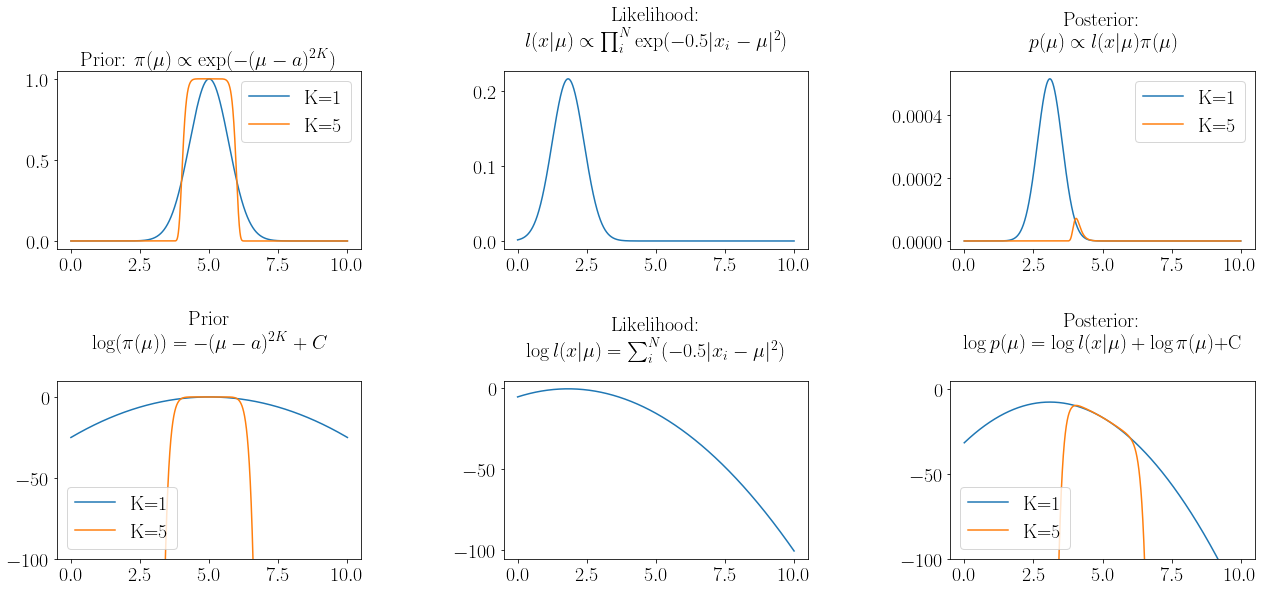

In [6]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6))= plt.subplots(2, 3,figsize=(20,10))# plt.figure(figsize=(4,4))
fig.tight_layout(pad=5)

# prior parameters
def prior(mu,a,K): #prior
    prior = np.exp(-((mu-a))**(K*2))
    return prior
def logprior(mu,a,K): #prior
    prior = -((mu-a))**(K*2)
    return prior


def likelihood(mu_l,X): #likelihood
    res = []
    for mu in mu_l:
        resi=1
        for xi in X:
            resi=np.exp(-0.5*np.abs(xi-mu)**2)*resi
        res.append(resi)
    return res

def loglikelihood(mu_l,X): #likelihood
    res = []
    for mu in mu_l:
        resi=1
        for xi in X:
            resi=(-0.5*np.abs(xi-mu)**2)+resi
        res.append(resi)
    return res

# Define the potential 
# Number of data

def V(mu_l,X,K,a):
    res = []
    for mu in mu_l:
        resi = -0.5*np.sum(np.abs(X-mu)**2)-((mu-a))**(2*K)
        res.append(resi)
    return res

### set parameters
# data parameters
np.random.seed(11)
N=3
X = np.random.normal(1.5,1,N)
a = 5
K1=1
K2=5
mu = np.linspace(0.,10,10000)

K=K1
ax1.plot(mu,prior(mu,a,K),label="K="+str(K))
ax1.set_title("Prior: $\pi(\mu) \propto \exp ( -(\mu-a)^{2K})$")
ax4.plot(mu,logprior(mu,a,K),label="K="+str(K))
ax4.set_title("Prior \n$\log(\pi(\mu)) = -(\mu-a)^{2K}+C$",y=1.15)
ax4.set_ylim([-100,10])

K=K2
ax1.plot(mu,prior(mu,a,K),label="K="+str(K))
ax4.plot(mu,logprior(mu,a,K),label="K="+str(K))
ax1.legend()
ax4.legend()
ax2.plot(mu,likelihood(mu,X))
ax2.set_title("Likelihood:\n $l(x|\mu) \propto \prod_i^N \exp (- 0.5 |x_i-\mu|^2)$",y=1.1)
ax5.plot(mu,loglikelihood(mu,X))
ax5.set_title("Likelihood: \n$\log l(x|\mu) = \sum_i^N (- 0.5 |x_i-\mu|^2)$",y=1.1)

K=K1
ax3.plot(mu,np.array(likelihood(mu,X))*prior(mu,a,K),label="K="+str(K))
ax3.set_title("Posterior:\n $p(\mu) \propto l(x|\mu) \pi(\mu)$",y=1.1)
ax6.plot(mu,V(mu,X,K,a),label="K="+str(K))
# ax6.set_yscale("log")
ax6.set_title("Posterior: \n $\log p(\mu) = \log l(x|\mu) + \log\pi(\mu)$+C",y=1.15)
K=K2
ax3.plot(mu,np.array(likelihood(mu,X))*prior(mu,a,K),label="K="+str(K))
ax6.plot(mu,V(mu,X,K,a),label="K="+str(K))
ax6.set_ylim([-100,5])
ax3.legend()
ax6.legend()

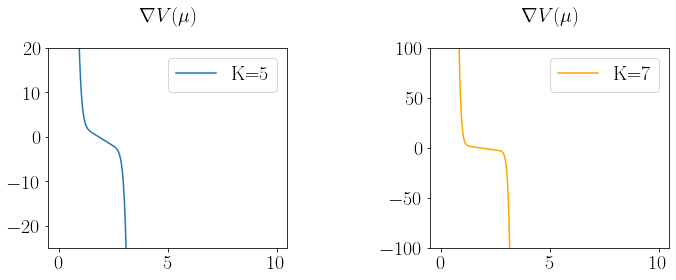

In [4]:
fig, ((ax1,ax2))= plt.subplots(1, 2,figsize=(12,6))# plt.figure(figsize=(4,4))
fig.tight_layout(pad=5)


def Vprime(mu_l,X,K,a):
    res = []
    sumX=np.sum(X)
    for mu in mu_l:
        resi = -2*K*np.power((mu-a),(2*K-1))+np.sum(X-mu)
        res.append(resi)
    return res

K=K1
ax1.plot(mu,Vprime(mu,X,K,a),label="K="+str(K))
ax1.set_title("$\\nabla V(\mu)$",y=1.1)
ax1.legend()
ax1.set_ylim([-25,20])

# ax1.set_yscale("log")

K=K2
ax2.plot(mu,Vprime(mu,X,K,a),label="K="+str(K),color="orange")
ax2.set_title("$\\nabla V(\mu)$",y=1.1)
ax2.set_ylim([-100,100])
ax2.legend()

### Non adaptive SDE : evaluate the behaviours with regards to K, tau gamma and dt. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from numba import jit,njit,vectorize, float64, int32
import numba as nb
import time as time
##############################
# Define some global variables
##############################
M=1
m=0.7
snap = 10

## Parameter of the function 
N=1
np.random.seed(11)
X=np.random.normal(1.5,1,N)
sumX=np.sum(X)
a=2
K=1

@njit(float64(float64,float64))
def Up(mu,K):
    res =-(-2*K*np.power((mu-a),(2*K-1))+sumX-N*mu)
    return res

@njit(float64(float64,float64,float64,float64))
def getg(mu,M,m,K): #,dtmin, dtmax, R):
    Kt2=2*K
    fx=(-Kt2*np.power((mu-a),(Kt2-1))+sumX-N*mu)
    g = 1/M+np.power((np.power(fx,2)+m*m),-0.5)
    return g

@njit(float64(float64,float64,float64,float64))
def getgprime(mu,M,m,K):
    Kt2=2*K
    mua2kminus1=np.power((mu-a),(Kt2-1))
    fx=(-Kt2*np.power((mu-a),(Kt2-1))+sumX-N*mu)
    fxprime=-Kt2*(Kt2-1)*np.power((mu-a),(Kt2-2))-N
    gprime = -fx*fxprime/np.power(fx*fx+m*m,1.5)
    return gprime

@njit(float64[:,:](float64[:],float64,float64,float64,float64,float64))
def one_traj_adaNTest(qp,Nt,dt,gamma,tau,K):
    t=0
    q=qp[0]
    p=qp[1]

    #set up vectors to save results 
    size_save = snap
    tqpg_list = np.zeros((size_save,5))
    save_i=0 

    #useful things to compute for first step
    f = -Up(q,K)
    g = 1
    # if include_ada==1:     #Transformed SDE
    #     g=getg(q,M,m,K)
    #     gp=getgprime(q,M,m,K)
    # elif include_ada==2:     # Rescaled SDE
    #     g=getg(q,M,m,K)

    gdt=g*dt

    for count in range(Nt):

        #**********
        #* STEP B *
        #**********
        p +=0.5*gdt*f 
            # Transformed SDE: step B with extra term in it
        # if include_ada==1:
        #     p += 0.5*dt*tau*gp

        #**********
        #* STEP A *
        #**********
        q += 0.5*gdt*p

        #**********
        #* STEP O *
        #**********
        dB = np.random.normal(0,1)
        C =np.exp(-gdt*gamma) 
        p = C*p+ np.sqrt((1-C*C)*tau)*dB

        #**********
        #* STEP A *
        #**********
        q += 0.5*gdt*p

        #**********
        #* STEP B *
        #**********
        # Need to compute new quantities for f and g 
        f = -Up(q,K)
        g=1                    # Normal SDE                
        # if include_ada==1:     # Transformed SDE
        #     g=getg(q,M,m,K)
        #     gp=getgprime(q,M,m,K)
        # elif include_ada==2:   # Rescaled SDE
        #     g=getg(q,M,m,K)
    
        gdt=g*dt

        p +=0.5*gdt*f 
            # Transformed SDE: step B with extra term in it
        # if include_ada==1:
        #     p += 0.5*dt*tau*gp

        #*********************************
        #* Save (p,q) and update time and*
        #*********************************
        if count==int(Nt/snap*save_i):
            tqpg_list[save_i,0]=t
            tqpg_list[save_i,1]=q
            tqpg_list[save_i,2]=p
            # if include_ada==1:
            #     tqpg_list[save_i,3]=gp
            # else:
            #     tqpg_list[save_i,3]=0
            tqpg_list[save_i,4]=g
            save_i+=1
        
        #* change the clock for the transformed SDE, move time forward using gdt.
        #* resulting in using gdt for all schemes
        #***********************************************************************
        # if include_ada==0:
        #     t+=dt
        # else:
        t+=gdt
    return(tqpg_list)

@njit(parallel=True)
def method_baoab_ada(n_samples,gamma,tau,Nt,h,K):
    nsample_pertraj = snap
    tqpg_list=np.zeros((n_samples*nsample_pertraj,6))
    ones_nsample=np.ones(nsample_pertraj)
    for j in nb.prange(n_samples):
        qi =np.random.uniform(0.5,1) #np.abs(np.random.normal(0,1,2)) #initial conditions np.array([2.0,0.0]) 
        pi=np.random.uniform(0.5,1)
        qipi=np.array([qi,pi])
        qp_samples = one_traj_adaNTest(qipi,Nt,h,gamma,tau,K)
        start_i = nsample_pertraj*j
        end_i = nsample_pertraj*(j+1)
        tqpg_list[start_i:end_i,1:6]=qp_samples
        tqpg_list[start_i:end_i,0]=ones_nsample*j
    return(tqpg_list)

#compile the method
test = method_baoab_ada(1,0.1,0.1,1,0.1,1)

#### Try with different values of h, tau and gamma

In [16]:
def get_final(qp):
    df = pd.DataFrame(qp,columns=["sim","t","Q","P","gp","g"]) #Create a dataset with only the final time
    idx = df.groupby(['sim'])['t'].transform(max) == df['t'] #Get the indexes of the final time
    final_df=df[idx] #Select only dataset with final time
    qf_list,pf_list = np.array(final_df["Q"]), np.array(final_df["P"]) #Get numpy arrays of the final values 
    return qf_list, pf_list

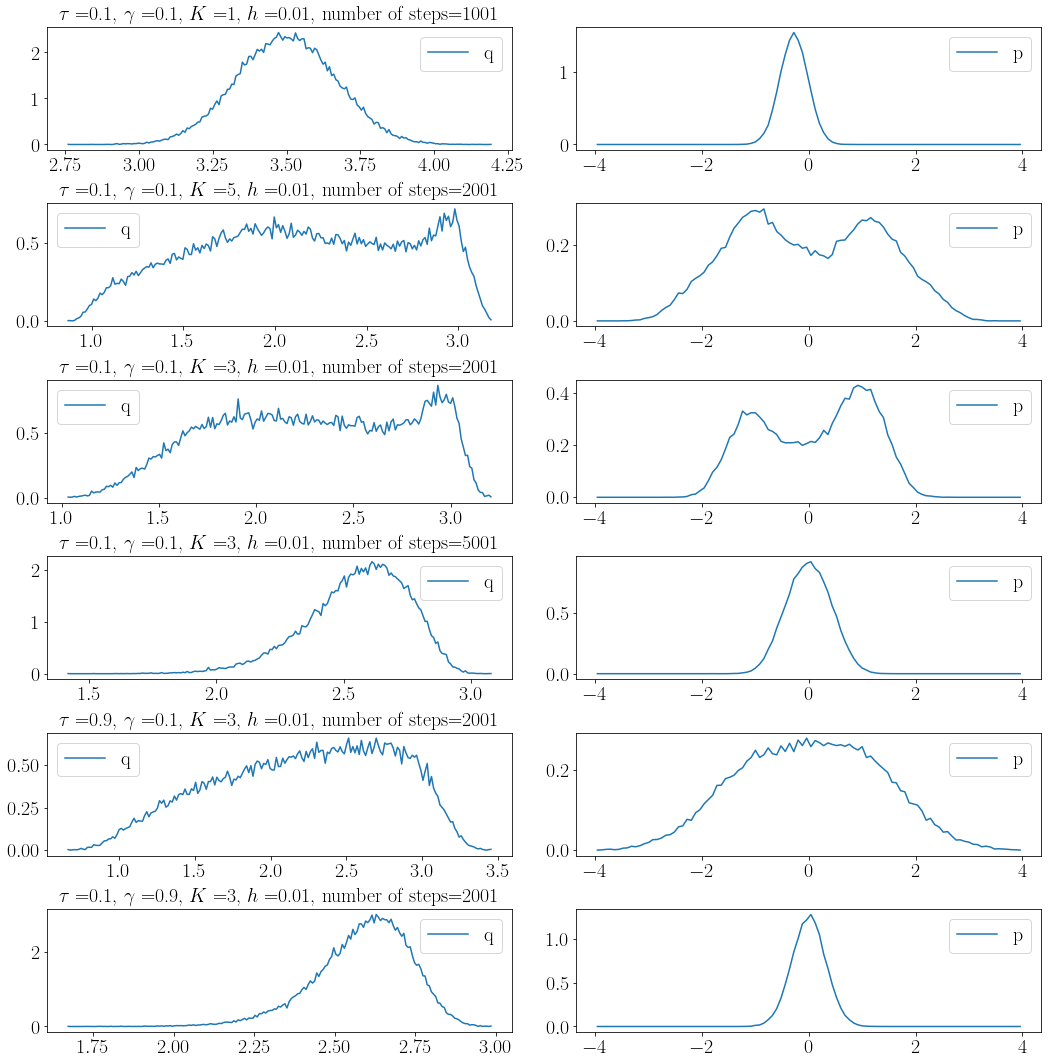

In [17]:

fig, (axs)= plt.subplots(6, 2,figsize=(15,15))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.tight_layout()
############################################################################################
# Example 1: ###############################################################################
############################################################################################
i=0
gamma = 0.1
tau=0.1
T=10
h=0.01
n_samples=50000
Ntimes=int(T*1/h)+1
K=1
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()

############################################################################################
# Example 2: ###############################################################################
############################################################################################
i=1
gamma = 0.1
tau=0.1
T=20
h=0.01
Ntimes=int(T*1/h)+1
K=5
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()

############################################################################################
# Example 3: ###############################################################################
############################################################################################
i=2
gamma = 0.1
tau=0.1
T=20
h=0.01
Ntimes=int(T*1/h)+1
K=3
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()

############################################################################################
# Example 4: ###############################################################################
############################################################################################
i=3
gamma = 0.1
tau=0.1
T=50
h=0.01
Ntimes=int(T*1/h)+1
K=3
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()


############################################################################################
# Example 4: ###############################################################################
############################################################################################
i=4
gamma = 0.1
tau=0.9
T=20
h=0.01
Ntimes=int(T*1/h)+1
K=3
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()

############################################################################################
# Example 4: ###############################################################################
############################################################################################
i=5
gamma = 0.9
tau=0.1
T=20
h=0.01
Ntimes=int(T*1/h)+1
K=3
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()


In [18]:
df = pd.DataFrame(qp,columns=["sim","t","q","p","gp","g"])
df['count'] = df.groupby(['sim']).cumcount()+1


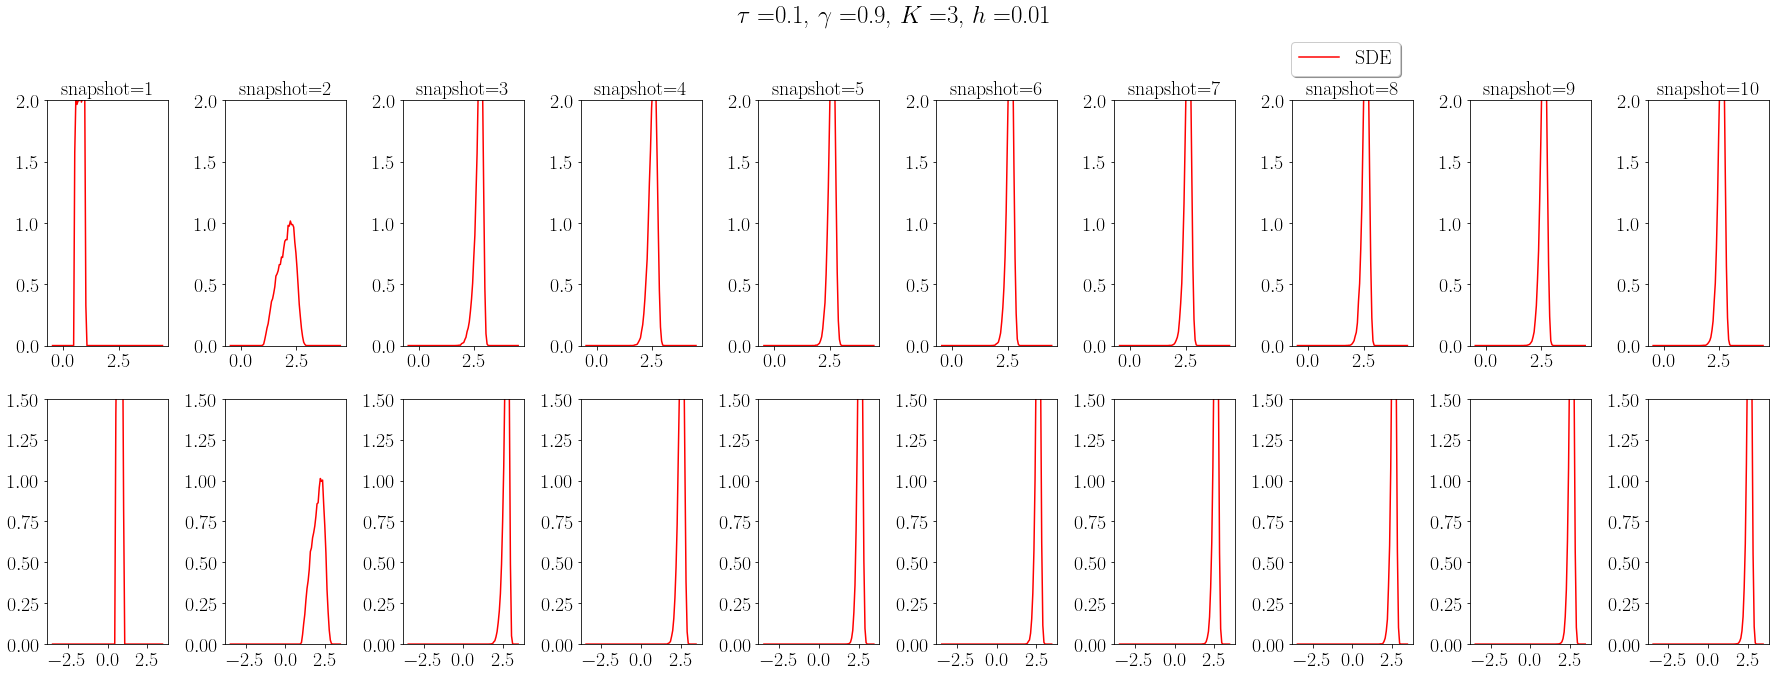

In [20]:
## Set up the plots 
fig, ((axs))= plt.subplots(2,snap,figsize=(25,10))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h))

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

b_p=3.5 #bounds for p distr
count_list = df["count"].unique()
## Loop through the values 
for i in range(snap):
    
    # List of time
    count_i = count_list[i]
    # * Dataframe 
    df_i=df[df['count']==count_i]
    
    # --- No ada
    histogram,bins = np.histogram(df_i["q"],bins=100,range=[-0.5,4.5], density=True)
    midx_q = (bins[0:-1]+bins[1:])/2
    axs[0,i].plot(midx_q,histogram,label='SDE',color="red")
    
    histogram,bins = np.histogram(df_i["q"],bins=100,range=[-b_p,b_p], density=True)
    midx_p = (bins[0:-1]+bins[1:])/2
    axs[1,i].plot(midx_p,histogram,label='SDE',color="red")

    axs[0,i].set_title("snapshot="+str(np.round(count_i,3)),fontsize= 20)

    # parameters of axis
    axs[0,i].set_ylim([0, 2])
    axs[1,i].set_ylim([0, 1.5])



axs[0,snap-1].legend(loc='lower center',bbox_to_anchor=(-2.5, 1.06),
           ncol=5, fancybox=True, shadow=True)


### Adaptive SDE
#### Design of function g(x) and g'(x)

In this case we use: 
$$
f(x) = \| \nabla V(\mu) \| = \| -2K(\mu-a)^{2K-1} + \sum(X-\mu) \|
$$
such that 
$$
g(\mu) = 1/M + 1/(\sqrt{\|f^2(\mu)\| + m^2})
$$
and 
$$
g'(\mu) = \frac{f(\mu) f'(\mu)}{(f^2(\mu)+m^2)^{3/2}}
$$

(1e-06, 100000)

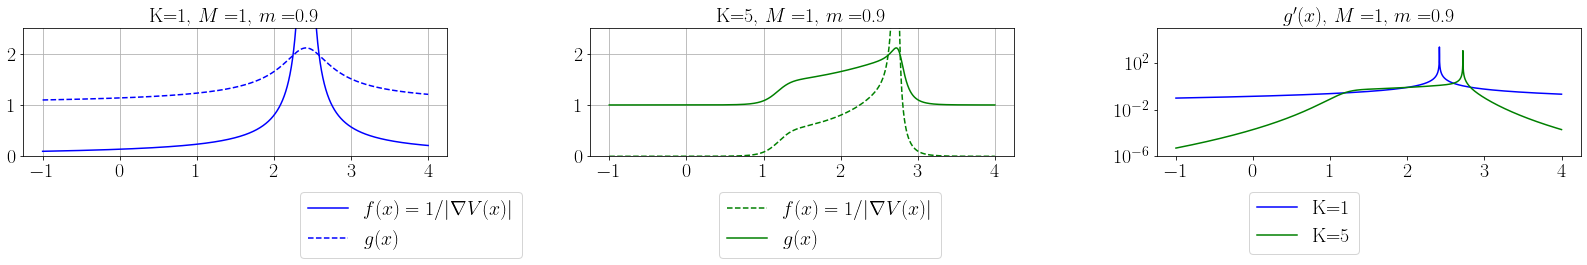

In [23]:
m=0.9
M=1
fig, ((ax1,ax2,ax3))= plt.subplots(1, 3,figsize=(25,5))# plt.figure(figsize=(4,4))
fig.tight_layout(pad=5)

#Data
np.random.seed(11)
N=1
X = np.random.normal(1.5,1,N)
a = 2
K1=1
K2=5
mu = np.linspace(-1.,4,10000)

def getfplot(mu,a,K,X):
    sumX=np.sum(X)
    N=len(X)
    fx=np.abs((-2*K*np.power((mu-a),(2*K-1))+sumX-N*mu))
    return 1/fx

def getgplot(mu,a,K,M,m,X):
    sumX=np.sum(X)
    N=len(X)
    fx=(-2*K*np.power((mu-a),(2*K-1))+sumX-N*mu)
    res = 1/M+np.power((np.power(fx,2)+m*m),-0.5)
    return res

def getgprime(mu,a,K,M,m,X):
    sumX=np.sum(X)
    N=len(X)
    mua2kminus1=np.power((mu-a),(2*K-1))
    Kt2=2*K
    fx=(-Kt2*mua2kminus1+sumX-N*mu)
    fxprime=-Kt2*(Kt2-1)*1/mua2kminus1-N
    res = -fx*fxprime/np.power(fx*fx+m*m,1.5)
    return res

ax1.plot(mu,getfplot(mu,a,K1,X),color="blue",label="$f(x) = 1/|\\nabla V(x)|$")
ax1.plot(mu,getgplot(mu,a,K1,M,m,X),"--",color="blue",label="$g(x)$")
# ax1.set_yscale("log")
ax1.legend(bbox_to_anchor=[1.2, -.2])
ax1.set_title("K="+str(K1)+", $M=$"+str(M)+", $m=$"+str(m))
ax1.set_ylim([0,2.5])
ax1.grid()

ax2.plot(mu,getfplot(mu,a,K2,X),"--",color="green",label="$f(x) = 1/|\\nabla V(x)|$")
ax2.plot(mu,getgplot(mu,a,K2,M,m,X),color="green",label="$g(x)$")
# ax2.set_yscale("log")
ax2.legend(bbox_to_anchor=[0.85, -.2])
ax2.set_title("K="+str(K2)+", $M=$"+str(M)+", $m=$"+str(m))
ax2.set_ylim([0,2.5])
ax2.grid()

ax3.plot(mu,getfplot(mu,a,K1,X),color="blue",label="K="+str(K1))
ax3.set_yscale("log")
ax3.set_title("$g'(x)$")

ax3.plot(mu,getfplot(mu,a,K2,X),color="green",label="K="+str(K2))
ax3.legend(bbox_to_anchor=[0.5, -.2])
ax3.set_title("$g'(x)$"+", $M=$"+str(M)+", $m=$"+str(m))
ax3.set_ylim([0.000001,100000])



#### Code the adaptive function and compare to the results we had previously
##### numpy code


In [182]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from numba import jit,njit,vectorize, float64, int32
import numba as nb
import time as time
##############################
# Define some global variables
##############################

snap = 10

## Parameter of the function 
N=1
np.random.seed(11)
X=np.random.normal(1.5,1,N)
sumX=np.sum(X)
a=2

@njit(float64(float64,float64))
def Up(mu,K):
    res =-(-2*K*np.power((mu-a),(2*K-1))+sumX-N*mu)
    return res

@njit(float64(float64,float64,float64,float64))
def getg(mu,M,m,K): #,dtmin, dtmax, R):
    Kt2=2*K
    fx=(-Kt2*np.power((mu-a),(Kt2-1))+sumX-N*mu)
    g = 1/M+np.power((np.power(fx,2)+m*m),-0.5)
    return g

@njit(float64(float64,float64,float64,float64))
def getgprime(mu,M,m,K):
    Kt2=2*K
    mua2kminus1=np.power((mu-a),(Kt2-1))
    fx=(-Kt2*np.power((mu-a),(Kt2-1))+sumX-N*mu)
    fxprime=-Kt2*(Kt2-1)*np.power((mu-a),(Kt2-2))-N
    gprime = -fx*fxprime/np.power(fx*fx+m*m,1.5)
    return gprime

@njit(float64[:,:](float64[:],float64,float64,float64,float64,int32,float64,float64,float64))
def one_traj_adaNTest(qp,Nt,dt,gamma,tau,include_ada,M,m,K):
    t=0
    q=qp[0]
    p=qp[1]

    #set up vectors to save results 
    size_save = snap
    tqpg_list = np.zeros((size_save,5))
    save_i=0 

    #useful things to compute for first step
    f = -Up(q,K)
    g = 1
    if include_ada==1:     #Transformed SDE
        g=getg(q,M,m,K)
        gp=getgprime(q,M,m,K)
    elif include_ada==2:     # Rescaled SDE
        g=getg(q,M,m,K)

    gdt=g*dt

    for count in range(Nt):

        #**********
        #* STEP B *
        #**********
        p +=0.5*gdt*f 
            # Transformed SDE: step B with extra term in it
        if include_ada==1:
            p += 0.5*dt*tau*gp

        #**********
        #* STEP A *
        #**********
        q += 0.5*gdt*p

        #**********
        #* STEP O *
        #**********
        dB = np.random.normal(0,1)
        C =np.exp(-gdt*gamma) 
        p = C*p+ np.sqrt((1-C*C)*tau)*dB

        #**********
        #* STEP A *
        #**********
        q += 0.5*gdt*p

        #**********
        #* STEP B *
        #**********
        # Need to compute new quantities for f and g 
        f = -Up(q,K)
        g=1                    # Normal SDE                
        if include_ada==1:     # Transformed SDE
            g=getg(q,M,m,K)
            gp=getgprime(q,M,m,K)
        elif include_ada==2:   # Rescaled SDE
            g=getg(q,M,m,K)
    
        gdt=g*dt

        p +=0.5*gdt*f 
            # Transformed SDE: step B with extra term in it
        if include_ada==1:
            p += 0.5*dt*tau*gp

        #*********************************
        #* Save (p,q) and update time and*
        #*********************************
        if count==int(Nt/snap*save_i):
            tqpg_list[save_i,0]=count
            tqpg_list[save_i,1]=q
            tqpg_list[save_i,2]=p
            if include_ada==1:
                tqpg_list[save_i,3]=gp
            else:
                tqpg_list[save_i,3]=0
            tqpg_list[save_i,4]=g
            save_i+=1
        
        #* change the clock for the transformed SDE, move time forward using gdt.
        #* resulting in using gdt for all schemes
        #***********************************************************************
        if include_ada==0:
            t+=dt
        else:
            t+=gdt
    return(tqpg_list)

@njit(parallel=True)
def method_baoab_ada(n_samples,gamma,tau,Nt,h,include_ada,M,m,K):
    nsample_pertraj = snap
    tqpg_list=np.zeros((n_samples*nsample_pertraj,6))
    ones_nsample=np.ones(nsample_pertraj)
    for j in nb.prange(n_samples):
        qi =np.random.uniform(0.5,1) #np.abs(np.random.normal(0,1,2)) #initial conditions np.array([2.0,0.0]) 
        pi=np.random.uniform(0.5,1)
        qipi=np.array([qi,pi])
        qp_samples = one_traj_adaNTest(qipi,Nt,h,gamma,tau,include_ada,M,m,K)
        start_i = nsample_pertraj*j
        end_i = nsample_pertraj*(j+1)
        tqpg_list[start_i:end_i,1:6]=qp_samples
        tqpg_list[start_i:end_i,0]=ones_nsample*j
    return(tqpg_list)

#compile the method
test = method_baoab_ada(1,0.1,0.1,1,0.1,0,1,0.5,1)

#### example 1

In [186]:
##########################################################################
## Example 1 
##########################################################################
i=2
gamma = 0.1
tau=0.1
T=30
h=0.01
Ntimes=int(T*1/h)+1
K=3
M=1
m=0.9
n_samples=100000


# No adaptivity 
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_noada = pd.DataFrame(pq_noada,columns=["sim","steps","q","p","gp","g"])
df_noada['count'] = df_noada.groupby(['sim']).cumcount()+1

# if include_ada==1 EM applied to transformed SDE and steps using t+=dt  
include_ada=1
%time pq_transfo= method_baoab_ada(n_samples,gamma,tau1,Ntimes,h,include_ada,M,m,K)
df_transfo = pd.DataFrame(pq_transfo,columns=["sim","steps","q","p","gp","g"])
df_transfo['count'] = df_transfo.groupby(['sim']).cumcount()+1

# if include_ada==2 EM applied to non transformed SDE but rescale steps t+=gdt
include_ada=2
%time pq_rescale= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_rescale = pd.DataFrame(pq_rescale,columns=["sim","steps","q","p","gp","g"])
df_rescale['count'] = df_rescale.groupby(['sim']).cumcount()+1

# No adaptivity 
T1_long=50
h=0.01
Ntimes=int(T1_long*1/h)+1
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_noada_T50 = pd.DataFrame(pq_noada,columns=["sim","steps","q","p","gp","g"])
df_noada_T50['count'] = df_noada_T50.groupby(['sim']).cumcount()+1

## save 
tau1, gamma1, K1, h1, T1, M1, m1 = tau, gamma, K, h, T, M, m
df_noada1 = df_noada
df_noada_T501 = df_noada_T50
df_transfo1 = df_transfo
df_rescale1 = df_rescale

CPU times: user 56.5 s, sys: 78.6 ms, total: 56.6 s
Wall time: 5.41 s
CPU times: user 1min 49s, sys: 135 ms, total: 1min 49s
Wall time: 10.5 s
CPU times: user 1min 14s, sys: 108 ms, total: 1min 14s
Wall time: 6.68 s
CPU times: user 1min 30s, sys: 93.1 ms, total: 1min 30s
Wall time: 8.12 s


#### example 2

In [184]:
##########################################################################
## Example 2
##########################################################################
i=2
gamma = 0.1
tau=0.1
T=30
h=0.01
Ntimes=int(T*1/h)+1
K=3
M=1
m=0.2
n_samples=100000


# No adaptivity 
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_noada = pd.DataFrame(pq_noada,columns=["sim","steps","q","p","gp","g"])
df_noada['count'] = df_noada.groupby(['sim']).cumcount()+1

# if include_ada==1 EM applied to transformed SDE and steps using t+=dt  
include_ada=1
%time pq_transfo= method_baoab_ada(n_samples,gamma,tau1,Ntimes,h,include_ada,M,m,K)
df_transfo = pd.DataFrame(pq_transfo,columns=["sim","steps","q","p","gp","g"])
df_transfo['count'] = df_transfo.groupby(['sim']).cumcount()+1

# if include_ada==2 EM applied to non transformed SDE but rescale steps t+=gdt
include_ada=2
%time pq_rescale= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_rescale = pd.DataFrame(pq_rescale,columns=["sim","steps","q","p","gp","g"])
df_rescale['count'] = df_rescale.groupby(['sim']).cumcount()+1

# No adaptivity 
T1_long=50
h=0.01
Ntimes=int(T1_long*1/h)+1
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_noada_T50 = pd.DataFrame(pq_noada,columns=["sim","steps","q","p","gp","g"])
df_noada_T50['count'] = df_noada_T50.groupby(['sim']).cumcount()+1

## save 
tau2, gamma2, K2, h2, T2, M2, m2 = tau, gamma, K, h, T, M, m
df_noada2 = df_noada
df_noada_T502 = df_noada_T50
df_transfo2 = df_transfo
df_rescale2 = df_rescale

CPU times: user 55.9 s, sys: 66.6 ms, total: 56 s
Wall time: 5.87 s
CPU times: user 1min 50s, sys: 147 ms, total: 1min 50s
Wall time: 11 s
CPU times: user 1min 16s, sys: 120 ms, total: 1min 16s
Wall time: 8.26 s
CPU times: user 1min 35s, sys: 130 ms, total: 1min 35s
Wall time: 9.59 s


#### example 3 

In [185]:
##########################################################################
## Example 3
##########################################################################
i=2
gamma = 0.1
tau=0.1
T=30
h=0.01
Ntimes=int(T*1/h)+1
K=3
M=2
m=0.9
n_samples=100000


# No adaptivity 
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_noada = pd.DataFrame(pq_noada,columns=["sim","steps","q","p","gp","g"])
df_noada['count'] = df_noada.groupby(['sim']).cumcount()+1

# if include_ada==1 EM applied to transformed SDE and steps using t+=dt  
include_ada=1
%time pq_transfo= method_baoab_ada(n_samples,gamma,tau1,Ntimes,h,include_ada,M,m,K)
df_transfo = pd.DataFrame(pq_transfo,columns=["sim","steps","q","p","gp","g"])
df_transfo['count'] = df_transfo.groupby(['sim']).cumcount()+1

# if include_ada==2 EM applied to non transformed SDE but rescale steps t+=gdt
include_ada=2
%time pq_rescale= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_rescale = pd.DataFrame(pq_rescale,columns=["sim","steps","q","p","gp","g"])
df_rescale['count'] = df_rescale.groupby(['sim']).cumcount()+1

# No adaptivity 
T1_long=50
h=0.01
Ntimes=int(T1_long*1/h)+1
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_noada_T50 = pd.DataFrame(pq_noada,columns=["sim","steps","q","p","gp","g"])
df_noada_T50['count'] = df_noada_T50.groupby(['sim']).cumcount()+1

## save 
tau3, gamma3, K3, h3, T3, M3, m3 = tau, gamma, K, h, T, M, m
df_noada3 = df_noada
df_noada_T503 = df_noada_T50
df_transfo3 = df_transfo
df_rescale3 = df_rescale

CPU times: user 58.5 s, sys: 85.2 ms, total: 58.6 s
Wall time: 5.96 s
CPU times: user 1min 54s, sys: 175 ms, total: 1min 54s
Wall time: 10.8 s
CPU times: user 1min 19s, sys: 133 ms, total: 1min 19s
Wall time: 7.86 s
CPU times: user 1min 34s, sys: 114 ms, total: 1min 34s
Wall time: 9.41 s


#### example 4


In [177]:
##########################################################################
## Example 4
##########################################################################
i=2
gamma = 0.1
tau=0.1
T=30
h=0.01
Ntimes=int(T*1/h)+1
K=8
M=1
m=0.9
n_samples=100000


# No adaptivity 
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_noada = pd.DataFrame(pq_noada,columns=["sim","steps","q","p","gp","g"])
df_noada['count'] = df_noada.groupby(['sim']).cumcount()+1

# if include_ada==1 EM applied to transformed SDE and steps using t+=dt  
include_ada=1
%time pq_transfo= method_baoab_ada(n_samples,gamma,tau1,Ntimes,h,include_ada,M,m,K)
df_transfo = pd.DataFrame(pq_transfo,columns=["sim","steps","q","p","gp","g"])
df_transfo['count'] = df_transfo.groupby(['sim']).cumcount()+1

# if include_ada==2 EM applied to non transformed SDE but rescale steps t+=gdt
include_ada=2
%time pq_rescale= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_rescale = pd.DataFrame(pq_rescale,columns=["sim","steps","q","p","gp","g"])
df_rescale['count'] = df_rescale.groupby(['sim']).cumcount()+1

# No adaptivity 
T1_long=50
h=0.01
Ntimes=int(T1_long*1/h)+1
include_ada=0   
%time pq_noada= method_baoab_ada(n_samples,gamma,tau,Ntimes,h,include_ada,M,m,K)
df_noada_T50 = pd.DataFrame(pq_noada,columns=["sim","steps","q","p","gp","g"])
df_noada_T50['count'] = df_noada_T50.groupby(['sim']).cumcount()+1

## save 
tau4, gamma4, K4, h4, T4, M4, m4 = tau, gamma, K, h, T, M, m
df_noada4 = df_noada
df_noada_T504 = df_noada_T50
df_transfo4 = df_transfo
df_rescale4 = df_rescale

CPU times: user 55.2 s, sys: 32.2 ms, total: 55.2 s
Wall time: 5.2 s
CPU times: user 1min 46s, sys: 92.4 ms, total: 1min 46s
Wall time: 9.45 s
CPU times: user 1min 13s, sys: 105 ms, total: 1min 13s
Wall time: 6.55 s
CPU times: user 1min 31s, sys: 125 ms, total: 1min 32s
Wall time: 8.3 s


### Plot

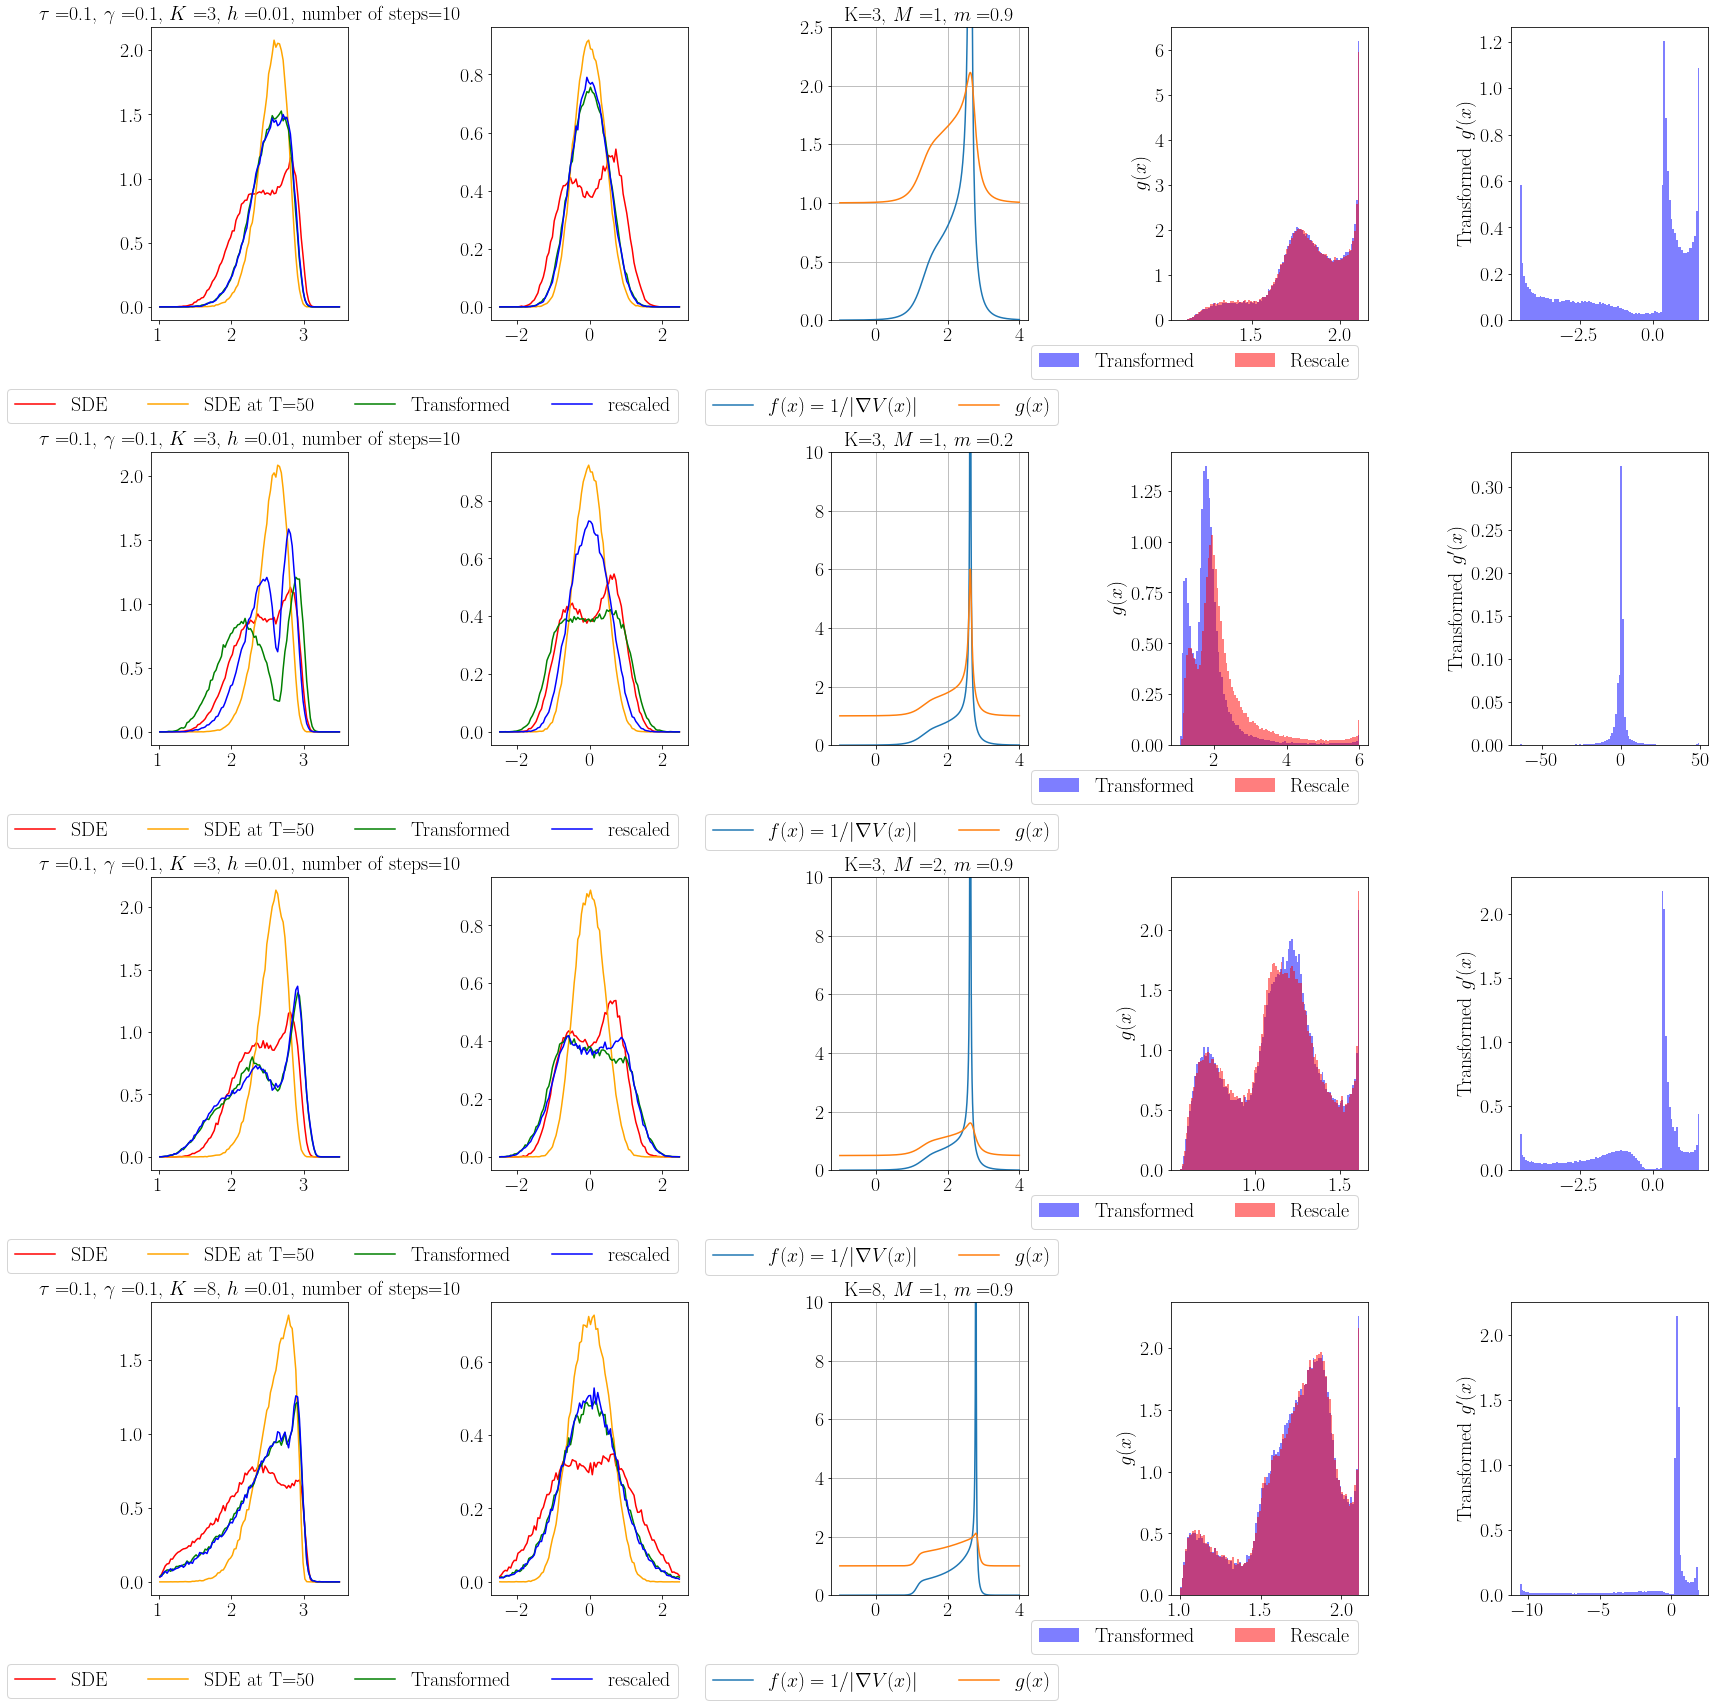

In [180]:

fig, (axs)= plt.subplots(4, 5,figsize=(25,25))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.tight_layout(pad=5)

############################################################################################
# Example 1: ###############################################################################
############################################################################################
i=0
tau, gamma, K, h, T, M, m = tau1, gamma1, K1, h, T1, M1, m1
df_noada = df_noada1
df_noada_T50 = df_noada_T501
df_transfo = df_transfo1
df_rescale = df_rescale1

b_q1=1
b_q2=3.5
b_p=2.5

count_i = df_noada['count'].max()
axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(count_i))


################
## Not adaptive
################
label_method="SDE"
color_method="red"
df=df_noada
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

############################
## Not adaptive but at T=50s
#############################
label_method="SDE at T=50"
color_method="orange"
df=df_noada_T50
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

################
## Transformed
################

label_method="Transformed"
color_method="green"
df=df_transfo
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)


################
## Rescaled
################

# --- Dummy rescaled
label_method="rescaled"
color_method="blue"
df=df_rescale
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)
axs[i,1].legend(bbox_to_anchor=[1,-0.2], fontsize=20, ncol=4)

##############################
## Distribution of function g 
##############################
var = df_transfo[df_transfo['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)

var = df_rescale[df_rescale['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="Rescale",alpha=0.5)
axs[i,3].set_ylabel("$g(x)$")
axs[i,3].legend(bbox_to_anchor=[1,-0.05], fontsize=20, ncol=4)

################################
## Distribution of function gp 
################################
var = df_transfo[df_transfo['count']==count_i]["gp"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,4].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)
axs[i,4].set_ylabel("Transformed $g'(x)$")

################
## Function g(x)
################

axs[i,2].plot(mu,getfplot(mu,a,K,X),label="$f(x) = 1/|\\nabla V(x)|$")
axs[i,2].plot(mu,getgplot(mu,a,K,M,m,X),label="$g(x)$")
# ax1.set_yscale("log")
axs[i,2].legend(bbox_to_anchor=[1.2, -.2], ncol=2, fontsize=20)
axs[i,2].set_title("K="+str(K)+", $M=$"+str(M)+", $m=$"+str(m))
axs[i,2].set_ylim([0,2.5])
axs[i,2].grid()

#########################################################################################################################################################
# Example 2: ############################################################################################################################################
#############################################################################################################################################################
i=1
tau, gamma, K, h, T, M, m = tau2, gamma2, K2, h2, T2, M2, m2
df_noada = df_noada2
df_noada_T50 = df_noada_T502
df_transfo = df_transfo2
df_rescale = df_rescale2

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(count_i))
b_q1=1
b_q2=3.5
b_p=2.5

count_i = df_noada['count'].max()

################
## Not adaptive
################
label_method="SDE"
color_method="red"
df=df_noada
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

############################
## Not adaptive but at T=50s
#############################
label_method="SDE at T=50"
color_method="orange"
df=df_noada_T50
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

################
## Transformed
################

label_method="Transformed"
color_method="green"
df=df_transfo
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)


################
## Rescaled
################

# --- Dummy rescaled
label_method="rescaled"
color_method="blue"
df=df_rescale
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)
axs[i,1].legend(bbox_to_anchor=[1,-0.2], fontsize=20, ncol=4)

##############################
## Distribution of function g 
##############################
var = df_transfo[df_transfo['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)

var = df_rescale[df_rescale['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="Rescale",alpha=0.5)
axs[i,3].set_ylabel("$g(x)$")
axs[i,3].legend(bbox_to_anchor=[1,-0.05], fontsize=20, ncol=4)

################################
## Distribution of function gp 
################################
var = df_transfo[df_transfo['count']==count_i]["gp"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,4].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)
axs[i,4].set_ylabel("Transformed $g'(x)$")

################
## Function g(x)
################

axs[i,2].plot(mu,getfplot(mu,a,K,X),label="$f(x) = 1/|\\nabla V(x)|$")
axs[i,2].plot(mu,getgplot(mu,a,K,M,m,X),label="$g(x)$")
# ax1.set_yscale("log")
axs[i,2].legend(bbox_to_anchor=[1.2, -.2], ncol=2, fontsize=20)
axs[i,2].set_title("K="+str(K)+", $M=$"+str(M)+", $m=$"+str(m))
axs[i,2].set_ylim([0,10])
axs[i,2].grid()

#########################################################################################################################################################
# Example 3: ############################################################################################################################################
#############################################################################################################################################################
i=2
tau, gamma, K, h, T, M, m = tau3, gamma3, K3, h3, T3, M3, m3
df_noada = df_noada3
df_noada_T50 = df_noada_T503
df_transfo = df_transfo3
df_rescale = df_rescale3

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(count_i))
b_q1=1
b_q2=3.5
b_p=2.5

count_i = df_noada['count'].max()

################
## Not adaptive
################
label_method="SDE"
color_method="red"
df=df_noada
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

############################
## Not adaptive but at T=50s
#############################
label_method="SDE at T=50"
color_method="orange"
df=df_noada_T50
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

################
## Transformed
################

label_method="Transformed"
color_method="green"
df=df_transfo
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)


################
## Rescaled
################

# --- Dummy rescaled
label_method="rescaled"
color_method="blue"
df=df_rescale
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)
axs[i,1].legend(bbox_to_anchor=[1,-0.2], fontsize=20, ncol=4)

##############################
## Distribution of function g 
##############################
var = df_transfo[df_transfo['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)

var = df_rescale[df_rescale['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="Rescale",alpha=0.5)
axs[i,3].set_ylabel("$g(x)$")
axs[i,3].legend(bbox_to_anchor=[1,-0.05], fontsize=20, ncol=4)

################################
## Distribution of function gp 
################################
var = df_transfo[df_transfo['count']==count_i]["gp"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,4].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)
axs[i,4].set_ylabel("Transformed $g'(x)$")


################
## Function g(x)
################

axs[i,2].plot(mu,getfplot(mu,a,K,X),label="$f(x) = 1/|\\nabla V(x)|$")
axs[i,2].plot(mu,getgplot(mu,a,K,M,m,X),label="$g(x)$")
# ax1.set_yscale("log")
axs[i,2].legend(bbox_to_anchor=[1.2, -.2], ncol=2, fontsize=20)
axs[i,2].set_title("K="+str(K)+", $M=$"+str(M)+", $m=$"+str(m))
axs[i,2].set_ylim([0,10])
axs[i,2].grid()


#########################################################################################################################################################
# Example 4: ############################################################################################################################################
#############################################################################################################################################################
i=3
tau, gamma, K, h, T, M, m = tau4, gamma4, K4, h4, T4, M4, m4
df_noada = df_noada4
df_noada_T50 = df_noada_T504
df_transfo = df_transfo4
df_rescale = df_rescale4

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(count_i))
b_q1=1
b_q2=3.5
b_p=2.5

count_i = df_noada['count'].max()

################
## Not adaptive
################
label_method="SDE"
color_method="red"
df=df_noada
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

############################
## Not adaptive but at T=50s
#############################
label_method="SDE at T=50"
color_method="orange"
df=df_noada_T50
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)

################
## Transformed
################

label_method="Transformed"
color_method="green"
df=df_transfo
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)


################
## Rescaled
################

# --- Dummy rescaled
label_method="rescaled"
color_method="blue"
df=df_rescale
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)
# p distribution
histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label=label_method,color=color_method)
axs[i,1].legend(bbox_to_anchor=[1,-0.2], fontsize=20, ncol=4)

##############################
## Distribution of function g 
##############################
var = df_transfo[df_transfo['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)

var = df_rescale[df_rescale['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="Rescale",alpha=0.5)
axs[i,3].set_ylabel("$g(x)$")
axs[i,3].legend(bbox_to_anchor=[1,-0.05], fontsize=20, ncol=4)

################################
## Distribution of function gp 
################################
var = df_transfo[df_transfo['count']==count_i]["gp"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,4].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)
axs[i,4].set_ylabel("Transformed $g'(x)$")


################
## Function g(x)
################

axs[i,2].plot(mu,getfplot(mu,a,K,X),label="$f(x) = 1/|\\nabla V(x)|$")
axs[i,2].plot(mu,getgplot(mu,a,K,M,m,X),label="$g(x)$")
# ax1.set_yscale("log")
axs[i,2].legend(bbox_to_anchor=[1.2, -.2], ncol=2, fontsize=20)
axs[i,2].set_title("K="+str(K)+", $M=$"+str(M)+", $m=$"+str(m))
axs[i,2].set_ylim([0,10])
axs[i,2].grid()

/home/s2133976/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/s2133976/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/s2133976/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


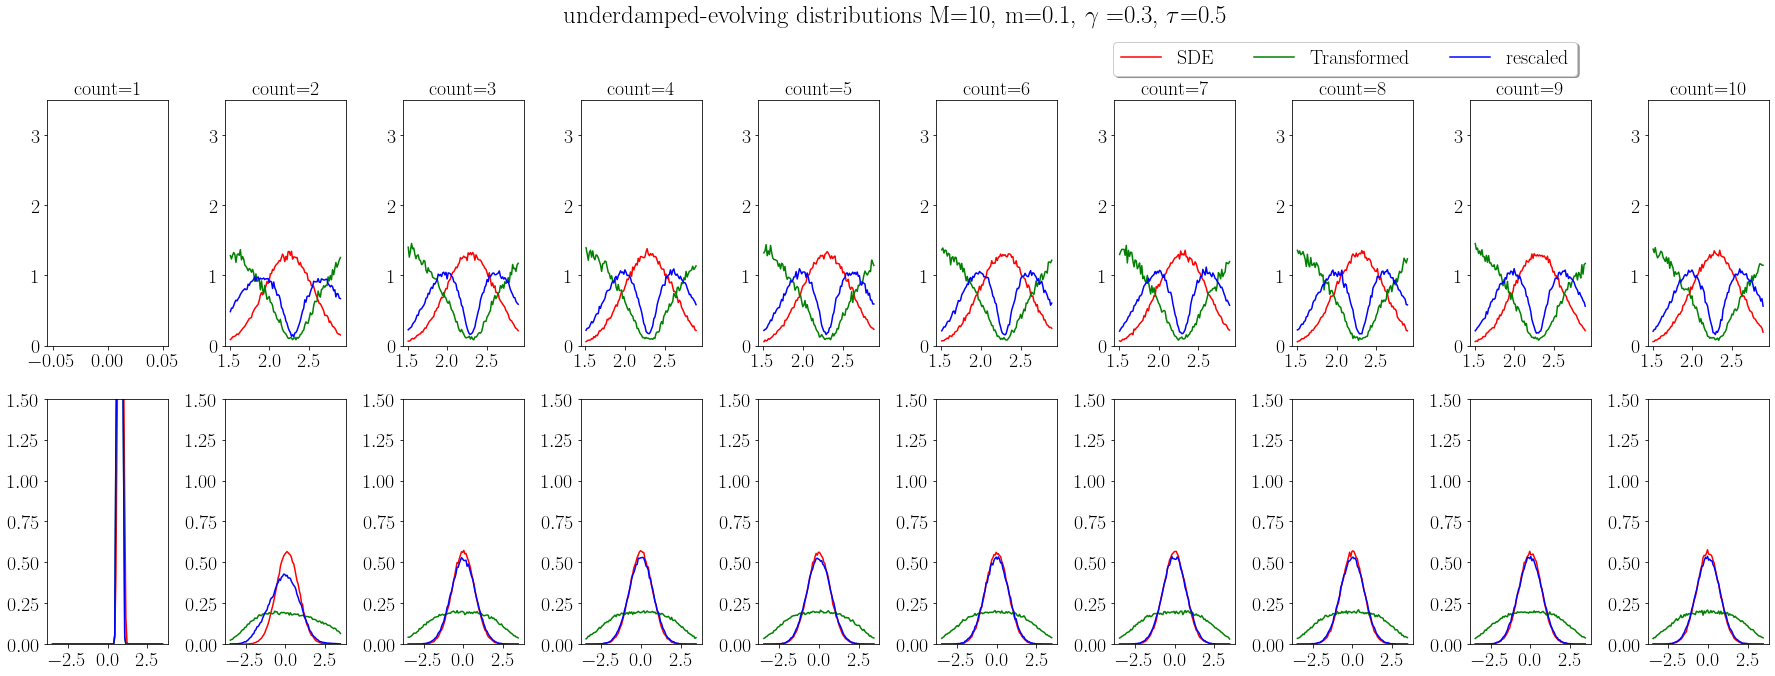

In [432]:
## Set up the plots 
fig, ((axs))= plt.subplots(2,snap,figsize=(25,10))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle('underdamped-evolving distributions M='+str(M)+', m=' +str(m)+", $\gamma=$"+str(gamma)+", $\\tau$="+str(tau), fontsize=25)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

b_q1=1.5
b_q2=2.9
b_p=3.5 #bounds for p distr
count_list = df_rescale['count'].unique()
## Loop through the values 
for i in range(snap):
    
    # List of counts
    count_i = count_list[i]

    # --- No ada
    label_method="SDE"
    color_method="red"
    df=df_noada
    df_i=df[df['count']==count_i]
    # q distribution
    histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
    midx_q = (bins[0:-1]+bins[1:])/2
    axs[0,i].plot(midx_q,histogram,label=label_method,color=color_method)
    # p distribution
    histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
    midx_p = (bins[0:-1]+bins[1:])/2
    axs[1,i].plot(midx_p,histogram,label=label_method,color=color_method)


    # --- Transformed
    label_method="Transformed"
    color_method="green"
    df=df_transfo
    df_i=df[df['count']==count_i]
    # q distribution
    histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
    midx_q = (bins[0:-1]+bins[1:])/2
    axs[0,i].plot(midx_q,histogram,label=label_method,color=color_method)
    # p distribution
    histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
    midx_p = (bins[0:-1]+bins[1:])/2
    axs[1,i].plot(midx_p,histogram,label=label_method,color=color_method)

    # --- Dummy rescaled
    label_method="rescaled"
    color_method="blue"
    df=df_rescale
    df_i=df[df['count']==count_i]
    # q distribution
    histogram,bins = np.histogram(df_i["q"],bins=100,range=[b_q1,b_q2], density=True)
    midx_q = (bins[0:-1]+bins[1:])/2
    axs[0,i].plot(midx_q,histogram,label=label_method,color=color_method)
    # p distribution
    histogram,bins = np.histogram(df_i["p"],bins=100,range=[-b_p,b_p], density=True)
    midx_p = (bins[0:-1]+bins[1:])/2
    axs[1,i].plot(midx_p,histogram,label=label_method,color=color_method)


    # Formating plots 
    axs[0,i].set_title("count="+str(np.round(count_i,3)),fontsize= 20)
    axs[0,i].set_ylim([0, 3.5])
    axs[1,i].set_ylim([0, 1.5])



axs[0,snap-1].legend(loc='lower center',bbox_to_anchor=(-2.5, 1.06),
           ncol=5, fancybox=True, shadow=True)


fig.savefig('evolving_distrM'+str(M)+"m"+str(m)+"Nt"+str(500)+"h"+str(h)+"tau"+str(tau)+".png")

## Overdamped dynamic
#### numpy code


In [133]:
from numba import jit,njit,vectorize, float64, int32, boolean
import numba as nb
import numpy as np

##############
# Parameters #
##############

snap=10

# Parameter of the function 
############################
N=1
np.random.seed(11)
X=np.random.normal(1.5,1,N)
sumX=np.sum(X)
a=2


########################
# Potential parameters #
########################

@njit(float64(float64))
def Up(mu):
    res =-(-2*K*np.power((mu-a),(2*K-1))+sumX-N*mu)
    return res

########################
#  Adaptive function G #
########################
@njit(float64(float64,float64,float64,float64))
def getg(mu,M,m,K): #,dtmin, dtmax, R):
    Kt2=2*K
    fx=(-Kt2*np.power((mu-a),(Kt2-1))+sumX-N*mu)
    g = 1/M+np.power((np.power(fx,2)+m*m),-0.5)
    return g

@njit(float64(float64,float64,float64,float64))
def getgprime(mu,M,m,K):
    Kt2=2*K
    mua2kminus1=np.power((mu-a),(Kt2-1))
    fx=(-Kt2*np.power((mu-a),(Kt2-1))+sumX-N*mu)
    fxprime=-Kt2*(Kt2-1)*np.power((mu-a),(Kt2-2))-N
    gprime = -fx*fxprime/np.power(fx*fx+m*m,1.5)
    return gprime


####################
#  Numerical method#
####################  

@njit(float64[:,:](int32,float64,float64,int32,float64,float64,float64))
def one_traj_ada(Nt,dt,tau,include_ada,M,m,K):
    """
    Run the simulation for one sample path
    Input
    -----
    Ntot: int
        Number of counts to take to get to Tf with dt
    dt: float 
        Value of time increment. Is 1/N.
    tau: float 
        Is in the multiplicative term of the SDE in sqrt(2 \tau dt). 
    Return
    ------
    x: float
        Value of X(T) as approximated by the numerical scheme chosen
    """

    x = 2 # initial value
    t = 0 # initialise time at t=0
    count=0

    #set up vectors to save results 
    size_save = snap

    ctxg_list = np.zeros((size_save,5))
    save_i=0 

    for count in range(Nt):
        # Compute the values of f, g, g' and g*dt 
        #########################################
        f = -Up(x)

        # No adaptivity   
        ###############
        if include_ada==0:
            g=1
            gp=0
            gdt=g*dt
            t+=dt

        # EM applied to transformed SDE and counts using t+=dt  
        #####################################################
        elif include_ada==1:
            g=getg(x,M,m,K)
            gp=getgprime(x,M,m,K)
            gdt=g*dt
            t+=dt

        # EM applied to non transformed SDE but rescale counts
        #####################################################
        elif include_ada==2:
            g=getg(x,M,m,K)
            gp=0 #do not want to add this term so set it to 0. 
            gdt=g*dt
            t+=gdt

        # Compute the values of next count 
        #################################
        b1 = np.random.normal(0,1)
        x+=f*gdt+np.sqrt(tau*gdt*2)*b1+dt*tau*gp

        #****************************
        #* Save (x) and update time *
        #****************************
        if count==int(Nt/snap*save_i):
            ctxg_list[save_i,0]=count
            ctxg_list[save_i,1]=t
            ctxg_list[save_i,2]=x
            ctxg_list[save_i,3]=g
            ctxg_list[save_i,4]=gp

            save_i+=1

        # Update the count 
        ###################
        count+=1

    return (ctxg_list)

####################################################
#  Numerical method ran over M statistical samples #
####################################################

@njit(parallel=True)
def nsample_ada(n_samples,Nt,dt,tau,include_ada,M,m,K): # Function is compiled and runs in machine code

    """
    Input
    -------
    n_samples: int
        Number of sample to draw
    Nt: int 
        number of run
    dt: float
        Size of the time discretization 
    tau: float
        Value of the temperature of the DW SDE (+ sqrt(2*tau)*dW)
    include_ada: int
        if include_ada==0 No adaptivity 
        if include_ada==1 EM applied to transformed SDE and counts using t+=dt  
        if include_ada==2 EM applied to non transformed SDE but rescale counts t+=gdt

    Return
    -------
    y_final: np.array
        Array of shape (M,). Sample of numerical approximation of the DW SDE at time T
    
    """
    nsample_pertraj = snap
    simctxdt_list=np.zeros((n_samples*nsample_pertraj,6))
    ones_nsample=np.ones(nsample_pertraj)

    for j in range(n_samples):
        ctxg_list =one_traj_ada(Nt,dt,tau,include_ada,M,m,K)
        start_i = nsample_pertraj*j
        end_i = nsample_pertraj*(j+1)
        simctxdt_list[start_i:end_i,1:6]=ctxg_list
        simctxdt_list[start_i:end_i,0]=ones_nsample*j
    return simctxdt_list

nsample_ada(2,10,0.1,0.1,1,1,1,2)


array([[ 0.        ,  0.        ,  0.1       ,  1.95463588,  1.62486123,
         0.30483952],
       [ 0.        ,  1.        ,  0.2       ,  2.09429532,  1.6111297 ,
         0.30292071],
       [ 0.        ,  2.        ,  0.3       ,  2.23093471,  1.65559236,
         0.35917864],
       [ 0.        ,  3.        ,  0.4       ,  2.22833878,  1.71805853,
         0.58851031],
       [ 0.        ,  4.        ,  0.5       ,  2.44430358,  1.71653898,
         0.58221545],
       [ 0.        ,  5.        ,  0.6       ,  2.62905795,  1.91044414,
         1.15506065],
       [ 0.        ,  6.        ,  0.7       ,  2.27848093,  1.93623338,
        -1.77053031],
       [ 0.        ,  7.        ,  0.8       ,  2.26891954,  1.74900704,
         0.71762085],
       [ 0.        ,  8.        ,  0.9       ,  2.53917971,  1.74228029,
         0.68960753],
       [ 0.        ,  9.        ,  1.        ,  2.65215732,  1.99654974,
         0.36997526],
       [ 1.        ,  0.        ,  0.1       ,  2.

#### example 1


In [160]:
##########################################################################
## Example 1 
##########################################################################
i=2
gamma = 0.1
tau=0.1
T=0.5
h=0.001
Nt=int(T*1/h)+1
K=3
M=1
m=0.9
n_samples=50000

# No adaptivity 
include_ada=0   
y= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_noada = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_noada["nstep"]=df_noada['count']
df_noada['count'] = df_noada.groupby(['sim']).cumcount()+1

# if include_ada==1 EM applied to transformed SDE and steps using t+=dt  
include_ada=1
%time y= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_transfo = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_transfo["nstep"]=df_transfo['count']
df_transfo['count'] = df_transfo.groupby(['sim']).cumcount()+1

# if include_ada==2 EM applied to non transformed SDE but rescale steps t+=gdt
include_ada=2
%time y= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_rescale = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_rescale["nstep"]=df_rescale['count']
df_rescale['count'] = df_rescale.groupby(['sim']).cumcount()+1

# No adaptivity 
T1_long=50
h=0.001
Nt=int(T1_long*1/h)+1
include_ada=0   
%time pq_noada= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_noada_T50 = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_noada_T50["nstep"]=df_noada_T50['count']
df_noada_T50['count'] = df_noada_T50.groupby(['sim']).cumcount()+1

## save 
tau1, gamma1, K1, h1, T1, M1, m1 = tau, gamma, K, h, T, M, m
df_noada1 = df_noada
df_noada_T501 = df_noada_T50
df_transfo1 = df_transfo
df_rescale1 = df_rescale

CPU times: user 2min 23s, sys: 73.6 ms, total: 2min 23s
Wall time: 13 s
CPU times: user 1min 13s, sys: 69.5 ms, total: 1min 13s
Wall time: 6.34 s
CPU times: user 48min 22s, sys: 1.3 s, total: 48min 24s
Wall time: 4min 6s


#### example 2 

In [161]:
##########################################################################
## Example 2
##########################################################################
i=2
gamma = 0.1
tau=0.1
T=10
h=0.001
Nt=int(T*1/h)+1
K=3
M=1
m=0.9
n_samples=50000


# No adaptivity 
include_ada=0   
y= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_noada = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_noada["nstep"]=df_noada['count']
df_noada['count'] = df_noada.groupby(['sim']).cumcount()+1

# if include_ada==1 EM applied to transformed SDE and steps using t+=dt  
include_ada=1
%time y= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_transfo = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_transfo["nstep"]=df_transfo['count']
df_transfo['count'] = df_transfo.groupby(['sim']).cumcount()+1

# if include_ada==2 EM applied to non transformed SDE but rescale steps t+=gdt
include_ada=2
%time y= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_rescale = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_rescale["nstep"]=df_rescale['count']
df_rescale['count'] = df_rescale.groupby(['sim']).cumcount()+1

# No adaptivity 
T1_long=50
h=0.01
Nt=int(T1_long*1/h)+1
include_ada=0   
%time pq_noada= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_noada_T50 = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_noada_T50["nstep"]=df_noada_T50['count']
df_noada_T50['count'] = df_noada_T50.groupby(['sim']).cumcount()+1

## save 
tau2, gamma2, K2, h2, T2, M2, m2 = tau, gamma, K, h, T, M, m
df_noada2 = df_noada
df_noada_T502 = df_noada_T50
df_transfo2 = df_transfo
df_rescale2 = df_rescale

CPU times: user 24min 48s, sys: 684 ms, total: 24min 49s
Wall time: 2min 6s
CPU times: user 18min, sys: 479 ms, total: 18min
Wall time: 1min 31s
CPU times: user 5min 38s, sys: 164 ms, total: 5min 38s
Wall time: 28.8 s


#### example 3


In [166]:
##########################################################################
## Example 3
##########################################################################
i=2
gamma = 0.1
tau=0.1
T=0.5
h=0.001
Nt=int(T*1/h)+1
K=5
M=2
m=0.9
n_samples=50000


# No adaptivity 
include_ada=0   
y= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_noada = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_noada["nstep"]=df_noada['count']
df_noada['count'] = df_noada.groupby(['sim']).cumcount()+1

# if include_ada==1 EM applied to transformed SDE and steps using t+=dt  
include_ada=1
%time y= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_transfo = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_transfo["nstep"]=df_transfo['count']
df_transfo['count'] = df_transfo.groupby(['sim']).cumcount()+1

# if include_ada==2 EM applied to non transformed SDE but rescale steps t+=gdt
include_ada=2
%time y= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_rescale = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_rescale["nstep"]=df_rescale['count']
df_rescale['count'] = df_rescale.groupby(['sim']).cumcount()+1

# No adaptivity 
T1_long=50
h=0.001
Nt=int(T1_long*1/h)+1
include_ada=0   
%time pq_noada= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_noada_T50 = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_noada_T50["nstep"]=df_noada_T50['count']
df_noada_T50['count'] = df_noada_T50.groupby(['sim']).cumcount()+1

## save 
tau3, gamma3, K3, h3, T3, M3, m3 = tau, gamma, K, h, T, M, m
df_noada3 = df_noada
df_noada_T503 = df_noada_T50
df_transfo3 = df_transfo
df_rescale3 = df_rescale

CPU times: user 1min 30s, sys: 112 ms, total: 1min 30s
Wall time: 7.84 s
CPU times: user 1min 42s, sys: 140 ms, total: 1min 42s
Wall time: 8.99 s
CPU times: user 1h 7min 15s, sys: 1.8 s, total: 1h 7min 17s
Wall time: 5min 55s


#### example 4

In [164]:
##########################################################################
## Example 1 
##########################################################################
i=2
gamma = 0.1
tau=0.1
T=1
h=0.01
Nt=int(T*1/h)+1
K=7
M=1
m=0.9
n_samples=50000


# No adaptivity 
include_ada=0   
y= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_noada = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_noada["nstep"]=df_noada['count']
df_noada['count'] = df_noada.groupby(['sim']).cumcount()+1

# if include_ada==1 EM applied to transformed SDE and steps using t+=dt  
include_ada=1
%time y= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_transfo = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_transfo["nstep"]=df_transfo['count']
df_transfo['count'] = df_transfo.groupby(['sim']).cumcount()+1

# if include_ada==2 EM applied to non transformed SDE but rescale steps t+=gdt
include_ada=2
%time y= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_rescale = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_rescale["nstep"]=df_rescale['count']
df_rescale['count'] = df_rescale.groupby(['sim']).cumcount()+1

# No adaptivity 
T1_long=50
h=0.01
Nt=int(T1_long*1/h)+1
include_ada=0   
%time pq_noada= nsample_ada(n_samples,Nt,h,tau,include_ada,M,m,K)
df_noada_T50 = pd.DataFrame(y,columns=["sim","count","steps","x","g","gp"])
df_noada_T50["nstep"]=df_noada_T50['count']
df_noada_T50['count'] = df_noada_T50.groupby(['sim']).cumcount()+1

## save 
tau4, gamma4, K4, h4, T4, M4, m4 = tau, gamma, K, h, T, M, m
df_noada4 = df_noada
df_noada_T504 = df_noada_T50
df_transfo4 = df_transfo
df_rescale4 = df_rescale

CPU times: user 21.4 s, sys: 47.9 ms, total: 21.4 s
Wall time: 1.86 s
CPU times: user 18.8 s, sys: 63.8 ms, total: 18.9 s
Wall time: 1.63 s
CPU times: user 7min 3s, sys: 318 ms, total: 7min 3s
Wall time: 37 s


### Plots

KeyError: 'x'

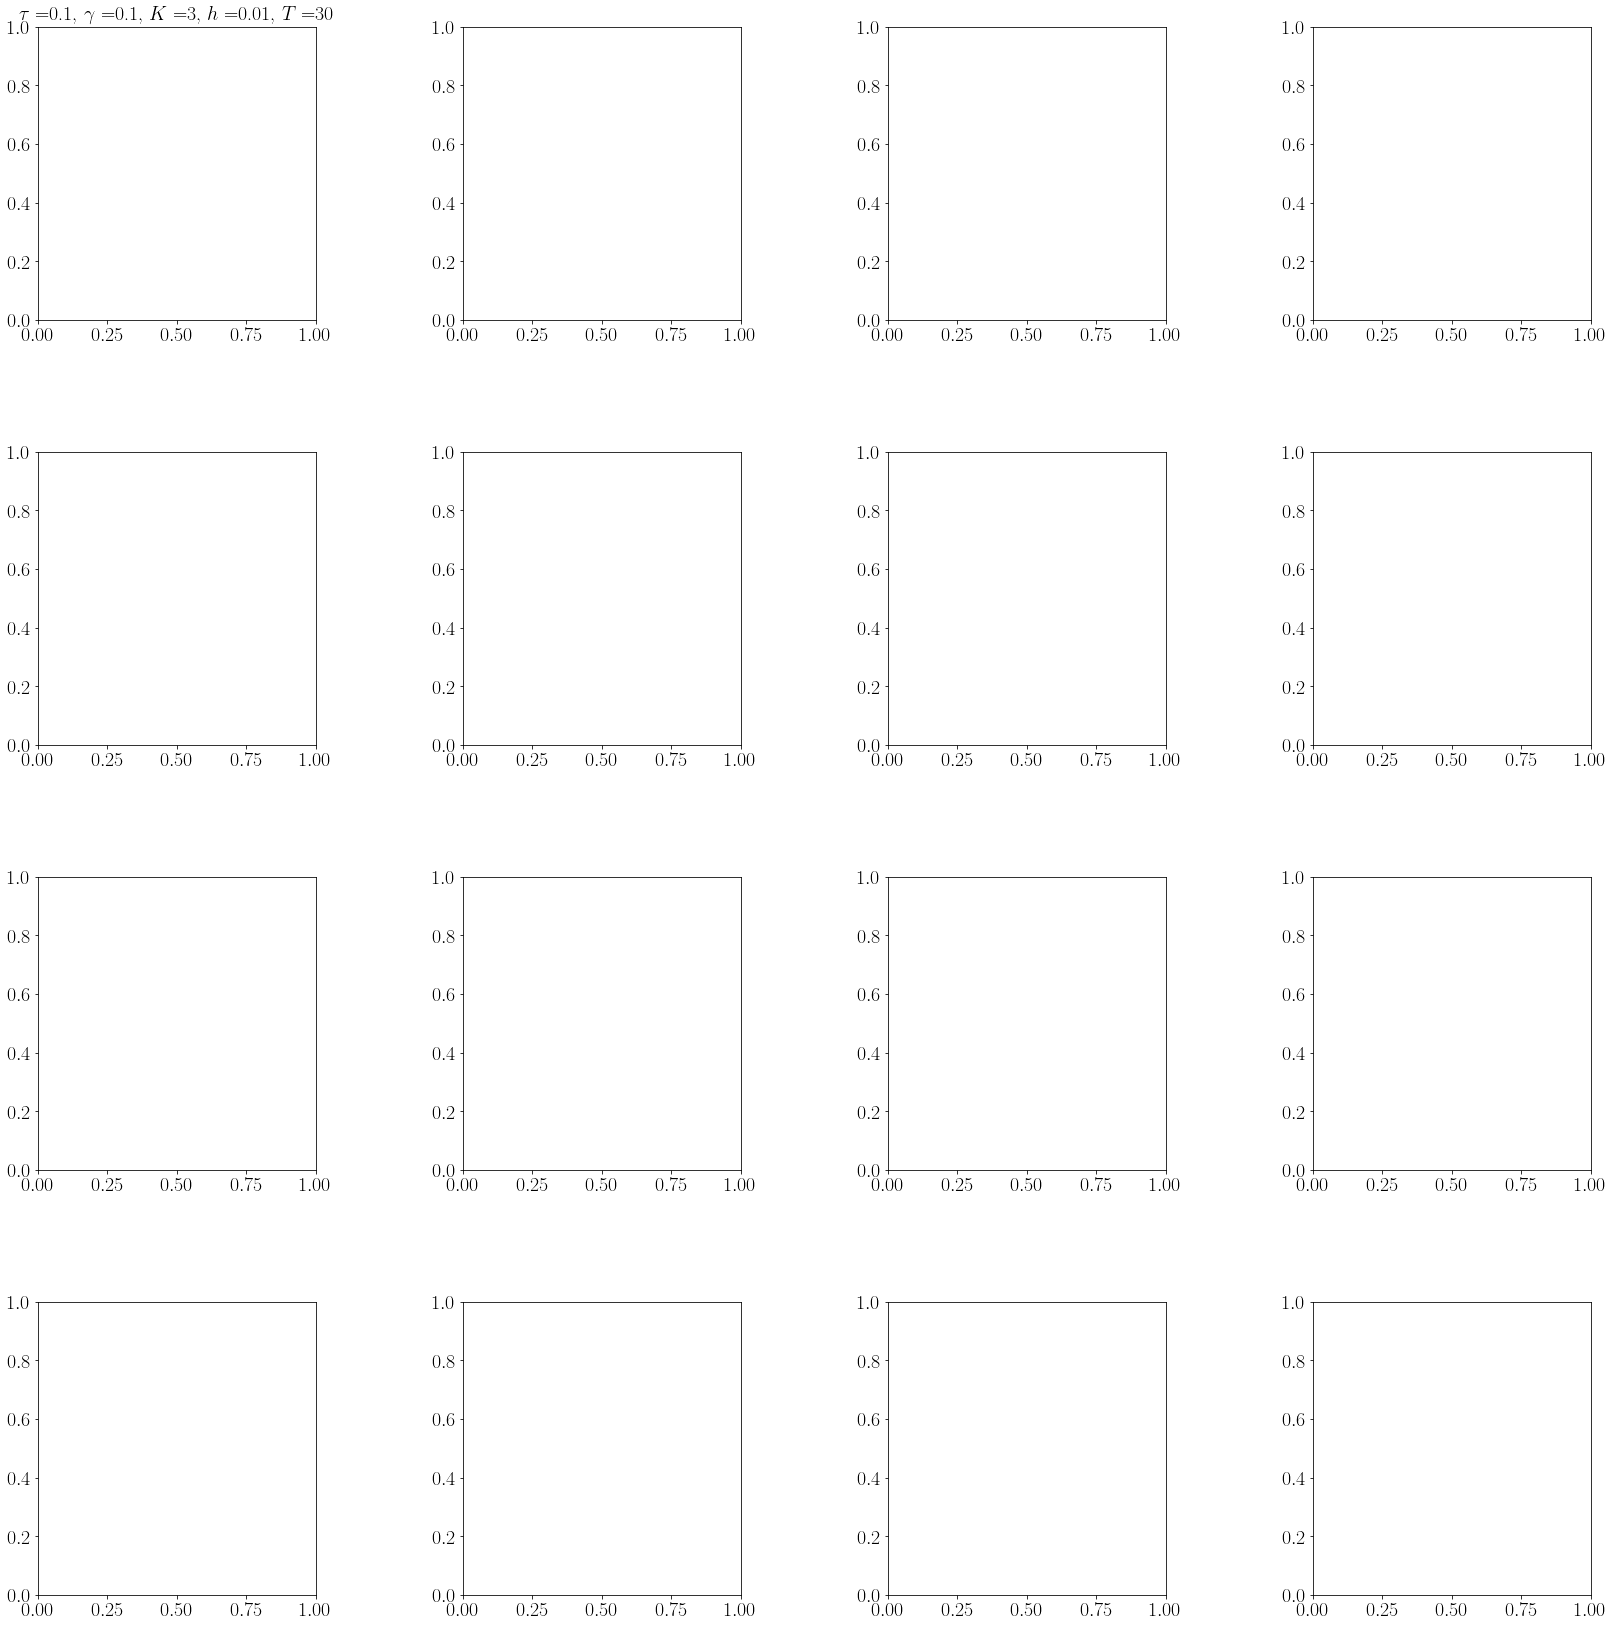

In [179]:

fig, (axs)= plt.subplots(4, 4,figsize=(25,25))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.tight_layout(pad=5)

############################################################################################
# Example 1: ###############################################################################
############################################################################################
i=0
tau, gamma, K, h, T, M, m = tau1, gamma1, K1, h, T1, M1, m1
df_noada = df_noada1
df_noada_T50 = df_noada_T501
df_transfo = df_transfo1
df_rescale = df_rescale1

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", $T=$"+str(T))
b_q1=1.5
b_q2=3.5
b_p=2.5

count_i = df_noada['count'].max()

################
## Not adaptive
################
label_method="SDE"
color_method="red"
df=df_noada
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)


############################
## Not adaptive but at T=50s
#############################
label_method="SDE at T=50"
color_method="orange"
df=df_noada_T50
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,"x",label=label_method,color=color_method)

################
## Transformed
################

label_method="Transformed"
color_method="green"
df=df_transfo
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)


################
## Rescaled
################

# --- Dummy rescaled
label_method="rescaled"
color_method="blue"
df=df_rescale
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)


##############################
## Distribution of function g 
##############################
var = df_transfo[df_transfo['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,2].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)

var = df_rescale[df_rescale['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,2].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="Rescale",alpha=0.5)
axs[i,2].set_ylabel("$g(x)$")
axs[i,0].legend(bbox_to_anchor=[2.5,-0.05], fontsize=20, ncol=4)

################################
## Distribution of function gp 
################################
var = df_transfo[df_transfo['count']==count_i]["gp"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)
axs[i,3].set_ylabel("Transformed $g'(x)$")

################
## Function g(x)
################

axs[i,1].plot(mu,getfplot(mu,a,K,X),label="$f(x) = 1/|\\nabla V(x)|$")
axs[i,1].plot(mu,getgplot(mu,a,K,M,m,X),label="$g(x)$")
# ax1.set_yscale("log")
axs[i,1].legend(bbox_to_anchor=[1.2, -.2], ncol=2, fontsize=20)
axs[i,1].set_title("K="+str(K)+", $M=$"+str(M)+", $m=$"+str(m))
axs[i,1].set_ylim([0,2.5])
axs[i,1].grid()




############################################################################################
# Example 2: ###############################################################################
############################################################################################
i=1
tau, gamma, K, h, T, M, m = tau2, gamma2, K2, h, T2, M2, m2
df_noada = df_noada2
df_noada_T50 = df_noada_T502
df_transfo = df_transfo2
df_rescale = df_rescale2

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(count_i))
b_q1=1.5
b_q2=3.5
b_p=2.5

count_i = df_noada['count'].max()

################
## Not adaptive
################
label_method="SDE"
color_method="red"
df=df_noada
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)


############################
## Not adaptive but at T=50s
#############################
label_method="SDE at T=50"
color_method="orange"
df=df_noada_T50
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,"x",label=label_method,color=color_method)

################
## Transformed
################

label_method="Transformed"
color_method="green"
df=df_transfo
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)


################
## Rescaled
################

# --- Dummy rescaled
label_method="rescaled"
color_method="blue"
df=df_rescale
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)


##############################
## Distribution of function g 
##############################
var = df_transfo[df_transfo['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,2].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)

var = df_rescale[df_rescale['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,2].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="Rescale",alpha=0.5)
axs[i,2].set_ylabel("$g(x)$")
axs[i,0].legend(bbox_to_anchor=[2.5,-0.05], fontsize=20, ncol=4)

################################
## Distribution of function gp 
################################
var = df_transfo[df_transfo['count']==count_i]["gp"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)
axs[i,3].set_ylabel("Transformed $g'(x)$")

################
## Function g(x)
################

axs[i,1].plot(mu,getfplot(mu,a,K,X),label="$f(x) = 1/|\\nabla V(x)|$")
axs[i,1].plot(mu,getgplot(mu,a,K,M,m,X),label="$g(x)$")
# ax1.set_yscale("log")
axs[i,1].legend(bbox_to_anchor=[1.2, -.2], ncol=2, fontsize=20)
axs[i,1].set_title("K="+str(K)+", $M=$"+str(M)+", $m=$"+str(m))
axs[i,1].set_ylim([0,2.5])
axs[i,1].grid()



############################################################################################
# Example 3: ###############################################################################
############################################################################################
i=2
tau, gamma, K, h, T, M, m = tau3, gamma3, K3, h, T3, M3, m3
df_noada = df_noada3
df_noada_T50 = df_noada_T503
df_transfo = df_transfo3
df_rescale = df_rescale3

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(count_i))
b_q1=1.5
b_q2=3.5
b_p=2.5

count_i = df_noada['count'].max()

################
## Not adaptive
################
label_method="SDE"
color_method="red"
df=df_noada
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)


############################
## Not adaptive but at T=50s
#############################
label_method="SDE at T=50"
color_method="orange"
df=df_noada_T50
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,"x",label=label_method,color=color_method)

################
## Transformed
################

label_method="Transformed"
color_method="green"
df=df_transfo
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)


################
## Rescaled
################

# --- Dummy rescaled
label_method="rescaled"
color_method="blue"
df=df_rescale
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)


##############################
## Distribution of function g 
##############################
var = df_transfo[df_transfo['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,2].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)

var = df_rescale[df_rescale['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,2].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="Rescale",alpha=0.5)
axs[i,2].set_ylabel("$g(x)$")
axs[i,0].legend(bbox_to_anchor=[2.5,-0.05], fontsize=20, ncol=4)

################################
## Distribution of function gp 
################################
var = df_transfo[df_transfo['count']==count_i]["gp"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)
axs[i,3].set_ylabel("Transformed $g'(x)$")

################
## Function g(x)
################

axs[i,1].plot(mu,getfplot(mu,a,K,X),label="$f(x) = 1/|\\nabla V(x)|$")
axs[i,1].plot(mu,getgplot(mu,a,K,M,m,X),label="$g(x)$")
# ax1.set_yscale("log")
axs[i,1].legend(bbox_to_anchor=[1.2, -.2], ncol=2, fontsize=20)
axs[i,1].set_title("K="+str(K)+", $M=$"+str(M)+", $m=$"+str(m))
axs[i,1].set_ylim([0,2.5])
axs[i,1].grid()




############################################################################################
# Example 4: ###############################################################################
############################################################################################
i=3
tau, gamma, K, h, T, M, m = tau4, gamma4, K4, h, T4, M4, m4
df_noada = df_noada4
df_noada_T50 = df_noada_T504
df_transfo = df_transfo4
df_rescale = df_rescale4

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(count_i))
b_q1=1.5
b_q2=3.5
b_p=2.5

count_i = df_noada['count'].max()

################
## Not adaptive
################
label_method="SDE"
color_method="red"
df=df_noada
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)


############################
## Not adaptive but at T=50s
#############################
label_method="SDE at T=50"
color_method="orange"
df=df_noada_T50
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,"x",label=label_method,color=color_method)

################
## Transformed
################

label_method="Transformed"
color_method="green"
df=df_transfo
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)


################
## Rescaled
################

# --- Dummy rescaled
label_method="rescaled"
color_method="blue"
df=df_rescale
df_i=df[df['count']==count_i]
# q distribution
histogram,bins = np.histogram(df_i["x"],bins=100,range=[b_q1,b_q2], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label=label_method,color=color_method)


##############################
## Distribution of function g 
##############################
var = df_transfo[df_transfo['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,2].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)

var = df_rescale[df_rescale['count']==count_i]["g"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,2].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="Rescale",alpha=0.5)
axs[i,2].set_ylabel("$g(x)$")
axs[i,0].legend(bbox_to_anchor=[2.5,-0.05], fontsize=20, ncol=4)

################################
## Distribution of function gp 
################################
var = df_transfo[df_transfo['count']==count_i]["gp"]
lowerbound=np.min(var)
upperbound=np.max(var)
nbins=100
histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
midx = (bins[0:-1]+bins[1:])/2
axs[i,3].bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)
axs[i,3].set_ylabel("Transformed $g'(x)$")

################
## Function g(x)
################

axs[i,1].plot(mu,getfplot(mu,a,K,X),label="$f(x) = 1/|\\nabla V(x)|$")
axs[i,1].plot(mu,getgplot(mu,a,K,M,m,X),label="$g(x)$")
# ax1.set_yscale("log")
axs[i,1].legend(bbox_to_anchor=[1.2, -.2], ncol=2, fontsize=20)
axs[i,1].set_title("K="+str(K)+", $M=$"+str(M)+", $m=$"+str(m))
axs[i,1].set_ylim([0,2.5])
axs[i,1].grid()
